# Business Case: Walmart - Confidence Interval and CLT

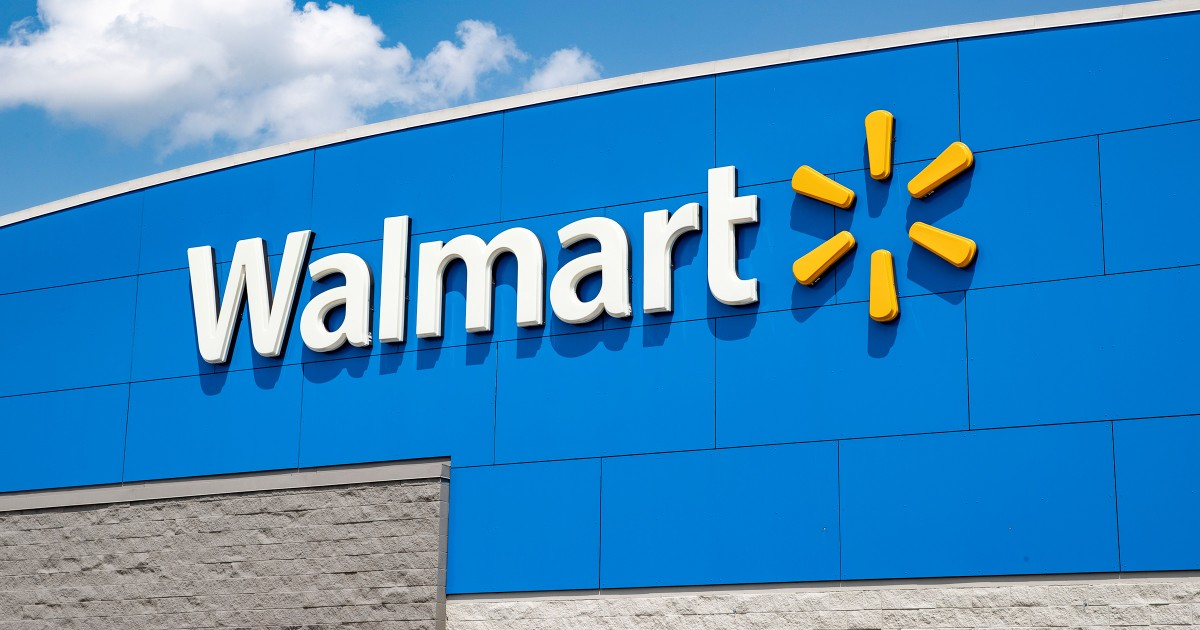

# About Walmart
 
Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores fro   m the United States. Walmart has more than 100 million customers worldwide.

# Defining Problem Statement
The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

# Importing Dataset

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Analyzing basic metrics 

In [86]:
df = pd.read_csv(r"https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?16412850")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [87]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [88]:
df.shape

(550068, 10)

In [89]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [90]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

## Missing Value Detection 

In [91]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

#### Insight - There is no missing value in the walmart dataset.

In [92]:
np.any(df.duplicated())

False

In [93]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
550063    False
550064    False
550065    False
550066    False
550067    False
Length: 550068, dtype: bool

### conversion of categorical attributes to 'category'

In [94]:
#Converting User_ID column datatype to int32
df['User_ID'] = df['User_ID'].astype('int32')

In [95]:
#Updating 'Marital_Status' column
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Married' if x == 1 else 'Single')

In [96]:
df['Marital_Status'] = df['Marital_Status'].astype('category')

In [97]:
#Converting 'Age' column datatype to category
df['Age'] = df['Age'].astype('category')

In [98]:
#Converting 'Product_Category' column datatype to int8
df['Product_Category'] = df['Product_Category'].astype('int8')

In [99]:
#Converting 'Occupation' column's datatype to int8
df['Occupation'] = df['Occupation'].astype('int8')

In [100]:
#Converting 'City_Category' column's datatype to category
df['City_Category'] = df['City_Category'].astype('category')

In [101]:
#Converting 'Stay_In_Current_City_Years' column's datatype to category
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('category')

### After conversion of categorical attributes to 'category'

In [102]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int32   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  object  
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int8    
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int8    
 9   Purchase                    550068 non-null  int64   
dtypes: category(4), int32(1), int64(1), int8(2), object(2)
memory usage: 17.8+ MB


In [17]:
df.describe()

,User_ID,Occupation,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,5.404270,9263.968713
std,1.727592e+03,6.522660,3.936211,5023.065394
min,1.000001e+06,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,20.000000,23961.000000


In [18]:
df.describe(include = 'object')

,Product_ID,Gender
count,550068,550068
unique,3631,2
top,P00265242,M
freq,1880,414259


# Non-Graphical Analysis

In [19]:
# How many unique customers' data is given in the dataset?
df['User_ID'].nunique()

5891

#### Insight - We have the data of 5891 customers who made at least one purchase on Black Friday in Walmart.


In [20]:
# Total number of transactions made by each gender
np.round(df['Gender'].value_counts(normalize = True) * 100, 2)

Gender
M    75.31
F    24.69
Name: proportion, dtype: float64

#### Insight - It is clear from the above that out of every four transactions, three are made by males.


In [157]:
np.round(df['Occupation'].value_counts(normalize = True) * 100, 2).cumsum()


Occupation
4     13.15
0     25.81
7     36.56
1     45.18
17    52.46
20    58.56
12    64.23
14    69.19
2     74.02
16    78.63
6     82.33
3     85.54
10    87.89
5     90.10
15    92.31
11    94.42
19    95.96
13    97.36
18    98.56
9     99.70
8     99.98
Name: proportion, dtype: float64

#### Insight - It can be inferred from the above that 82.33 % of the total transactions are made by the customers belonging to 11 occupations. These are 4, 0, 7, 1, 17, 20, 12, 14, 2, 16, 6 (Ordered in descending order of the total transactions' share.)


In [22]:
np.round(df['Stay_In_Current_City_Years'].value_counts(normalize = True) * 100, 2)


Stay_In_Current_City_Years
1     35.24
2     18.51
3     17.32
4+    15.40
0     13.53
Name: proportion, dtype: float64

#### Insight - From the above result, it is clear that majority of the transactions (53.75 % of total transactions) are made by the customers having 1 or 2 years of stay in the current city.

In [23]:
np.round(df['Product_Category'].value_counts(normalize = True).head(10) * 100, 2).cumsum()


Product_Category
5     27.44
1     52.96
8     73.67
11    78.09
2     82.43
6     86.15
3     89.82
4     91.96
16    93.75
15    94.89
Name: proportion, dtype: float64

#### Insight - It can be inferred from the above result that 82.43% of the total transactions are made for only 5 Product Categories. These are, 5, 1, 8, 11 and 2.


In [24]:
# How many unique customers are there for each gender
df_gender_dist = pd.DataFrame(df.groupby(by = ['Gender'])['User_ID'].nunique()).reset_index().rename(columns = {'User_ID' : 'unique_customers'})
df_gender_dist['percent_share'] = np.round(df_gender_dist['unique_customers'] / df_gender_dist['unique_customers'].sum() * 100, 2)
df_gender_dist

,Gender,unique_customers,percent_share
0,F,1666,28.28
1,M,4225,71.72


In [25]:
# How many transactions are made by each gender category ?
df.groupby(by = ['Gender'])['User_ID'].count()

Gender
F    135809
M    414259
Name: User_ID, dtype: int64

#### Insight - Total number of transactions made by female are 135809 while males made 414259 transactions.

In [26]:
print('Average number of transactions made by each Male on Black Friday is', round(414259 / 4225))
print('Average number of transactions made by each Female on Black Friday is', round(135809 / 1666))

Average number of transactions made by each Male on Black Friday is 98
Average number of transactions made by each Female on Black Friday is 82


In [27]:
# What is the total Revenue generated by Walmart from each Gender ?
df_gender_revenue = df.groupby(by = ['Gender'])['Purchase'].sum().to_frame().sort_values(by = 'Purchase', ascending = False).reset_index()
df_gender_revenue['percent_share'] = np.round((df_gender_revenue['Purchase'] / df_gender_revenue['Purchase'].sum()) * 100, 2)
df_gender_revenue

,Gender,Purchase,percent_share
0,M,3909580100,76.72
1,F,1186232642,23.28


#### Insight - Total Revenue generated by Walmart from females is 23.28% while from males its is 76.72%.

In [28]:
# What is the average total purchase made by each user in each gender ?
df1 = pd.DataFrame(df.groupby(by = ['Gender', 'User_ID'])['Purchase'].sum()).reset_index().rename(columns = {'Purchase' : 'Average_Purchase'})
df1.groupby(by = 'Gender')['Average_Purchase'].mean()

Gender
F    712024.394958
M    925344.402367
Name: Average_Purchase, dtype: float64

#### Insight - Average total purchase made by females is 712024.39 & by males it is 925344.40.

In [29]:
# What is the Average Revenue generated by Walmart from each Gender per transaction ?
pd.DataFrame(df.groupby(by = 'Gender')['Purchase'].mean()).reset_index().rename(columns = {'Purchase' : 'Average_Purchase'})

,Gender,Average_Purchase
0,F,8734.565765
1,M,9437.526040


#### Insight - Average total purchase made by females per transaction is 8734.565765 & by males it is 9437.526040.

In [31]:
# How many unique customers are there for each Marital Status ?
df_marital_status_dist = pd.DataFrame(df.groupby(by = ['Marital_Status'])['User_ID'].nunique()).reset_index().rename(columns = {'User_ID' : 'unique_customers'})
df_marital_status_dist['percent_share'] = np.round(df_marital_status_dist['unique_customers'] / df_marital_status_dist['unique_customers'].sum() * 100, 2)
df_marital_status_dist

,Marital_Status,unique_customers,percent_share
0,Married,2474,42.0
1,Single,3417,58.0


#### Insight - There are 2474 unique married customers and 3417 unique single customers.

In [32]:
# How many transactions are made by each Marital Status category ?
df.groupby(by = ['Marital_Status'])['User_ID'].count()

Marital_Status
Married    225337
Single     324731
Name: User_ID, dtype: int64

#### Insight - Total transaction made by married customers is 225337 & by single customers it is 324731.

In [33]:
print('Average number of transactions made by each user with marital status Married is', round(225337 / 2474))
print('Average number of transactions made by each with marital status Single is', round(324731 / 3417))

Average number of transactions made by each user with marital status Married is 91
Average number of transactions made by each with marital status Single is 95


In [34]:
#What is the total Revenue generated by Walmart from each Marital Status ?
df_marital_status_revenue = df.groupby(by = ['Marital_Status'])['Purchase'].sum().to_frame().sort_values(by = 'Purchase', ascending = False).reset_index()
df_marital_status_revenue['percent_share'] = np.round((df_marital_status_revenue['Purchase'] / df_marital_status_revenue['Purchase'].sum()) * 100, 2)
df_marital_status_revenue

,Marital_Status,Purchase,percent_share
0,Single,3008927447,59.05
1,Married,2086885295,40.95


#### Insight - Total revenue generated by Walmart by married customers is 40.95% & by single customers it is 59.05%.

In [35]:
df_age_dist = pd.DataFrame(df.groupby(by = ['Age'])['User_ID'].nunique()).reset_index().rename(columns = {'User_ID' : 'unique_customers'}).sort_values(by = 'unique_customers', ascending = False)
df_age_dist['percent_share'] =  np.round(df_age_dist['unique_customers'] / df_age_dist['unique_customers'].sum() * 100, 2)
df_age_dist['cumulative_percent'] =  df_age_dist['percent_share'].cumsum()
df_age_dist

,Age,unique_customers,percent_share,cumulative_percent
2,26-35,2053,34.85,34.85
3,36-45,1167,19.81,54.66
1,18-25,1069,18.15,72.81
4,46-50,531,9.01,81.82
5,51-55,481,8.16,89.98
6,55+,372,6.31,96.29
0,0-17,218,3.70,99.99


#### Insight - We have maximum customers of walmart in the age group 26-35.

In [36]:
df['Age'].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

In [37]:
df_age_revenue = pd.DataFrame(df.groupby(by = 'Age', as_index = False)['Purchase'].sum()).sort_values(by = 'Purchase', ascending = False)
df_age_revenue['percent_share'] = np.round((df_age_revenue['Purchase'] / df_age_revenue['Purchase'].sum()) * 100, 2)
df_age_revenue['cumulative_percent_share'] = df_age_revenue['percent_share'].cumsum()
df_age_revenue

,Age,Purchase,percent_share,cumulative_percent_share
2,26-35,2031770578,39.87,39.87
3,36-45,1026569884,20.15,60.02
1,18-25,913848675,17.93,77.95
4,46-50,420843403,8.26,86.21
5,51-55,367099644,7.20,93.41
6,55+,200767375,3.94,97.35
0,0-17,134913183,2.65,100.00


#### Insight - We found that the age group 26-35 contributes most in the revenue generation.

In [38]:
df_city_dist = pd.DataFrame(df.groupby(by = ['City_Category'])['User_ID'].nunique()).reset_index().rename(columns = {'User_ID' : 'unique_customers'})
df_city_dist['percent_share'] = np.round((df_city_dist['unique_customers'] / df_city_dist['unique_customers'].sum()) * 100, 2)
df_city_dist['cumulative_percent_share'] = df_city_dist['percent_share'].cumsum()
df_city_dist

,City_Category,unique_customers,percent_share,cumulative_percent_share
0,A,1045,17.74,17.74
1,B,1707,28.98,46.72
2,C,3139,53.28,100.00


In [39]:
df['City_Category'].value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

In [40]:
# What is the revenue generated from different cities ?
df_city_revenue = df.groupby(by = ['City_Category'])['Purchase'].sum().to_frame().sort_values(by = 'Purchase', ascending = False).reset_index()
df_city_revenue['percent_share'] = np.round((df_city_revenue['Purchase'] / df_city_revenue['Purchase'].sum()) * 100, 2)
df_city_revenue['cumulative_percent_share'] = df_city_revenue['percent_share'].cumsum()
df_city_revenue

,City_Category,Purchase,percent_share,cumulative_percent_share
0,B,2115533605,41.52,41.52
1,C,1663807476,32.65,74.17
2,A,1316471661,25.83,100.00


#### Insight - We found that maximum revenue generated by the city B.

In [41]:
df.groupby(by = ['Product_Category'])['Product_ID'].nunique()

Product_Category
1      493
2      152
3       90
4       88
5      967
6      119
7      102
8     1047
9        2
10      25
11     254
12      25
13      35
14      44
15      44
16      98
17      11
18      30
19       2
20       3
Name: Product_ID, dtype: int64

In [42]:
# What is the revenue generated from different product categories ?
df_product_revenue = df.groupby(by = ['Product_Category'])['Purchase'].sum().to_frame().sort_values(by = 'Purchase', ascending = False).reset_index()
df_product_revenue['percent_share'] = np.round((df_product_revenue['Purchase'] / df_product_revenue['Purchase'].sum()) * 100, 2)
df_product_revenue['cumulative_percent_share'] = df_product_revenue['percent_share'].cumsum()
df_product_revenue

,Product_Category,Purchase,percent_share,cumulative_percent_share
0,1,1910013754,37.48,37.48
1,5,941835229,18.48,55.96
2,8,854318799,16.77,72.73
3,6,324150302,6.36,79.09
4,2,268516186,5.27,84.36
5,3,204084713,4.00,88.36
6,16,145120612,2.85,91.21
7,11,113791115,2.23,93.44
8,10,100837301,1.98,95.42
9,15,92969042,1.82,97.24


#### Insight - Most of the revenue is generated by the product category 1 which is 37.48%.

In [43]:
top5 = df_product_revenue.head(5)['Purchase'].sum() /  df_product_revenue['Purchase'].sum()
top5 = np.round(top5 * 100, 2)
print(f'Top 5 product categories from which Walmart makes {top5} % of total revenue are : {list(df_product_revenue["Product_Category"].head())}')

Top 5 product categories from which Walmart makes 84.36 % of total revenue are : [1, 5, 8, 6, 2]


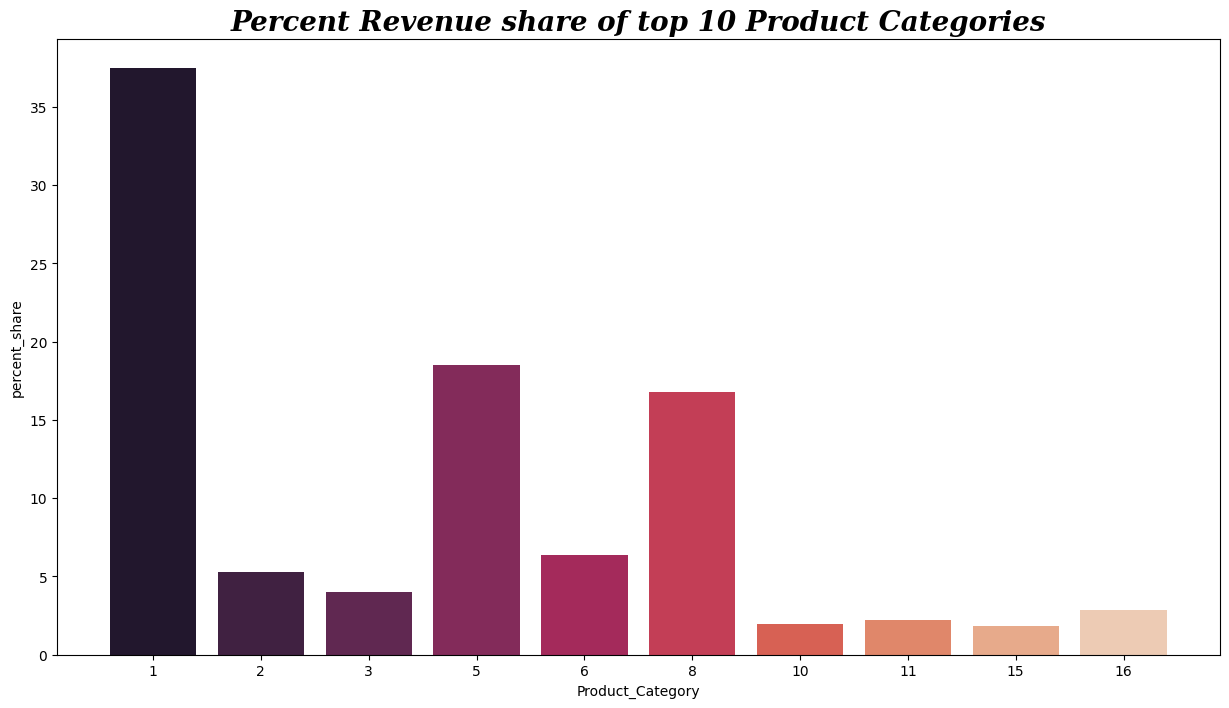

In [45]:
plt.figure(figsize = (15, 8))
plt.title('Percent Revenue share of top 10 Product Categories', fontsize = 20, fontweight = 600, fontfamily = 'serif', fontstyle = 'oblique')
sns.barplot(data = df_product_revenue, x = df_product_revenue.head(10)['Product_Category'], y = df_product_revenue.head(10)['percent_share'],palette = 'rocket')
plt.plot()
plt.show()

In [46]:
# What is the total Revenue generated by Walmart from each Gender ?
df_gender_revenue = df.groupby(by = ['Gender'])['Purchase'].sum().to_frame().sort_values(by = 'Purchase', ascending = False).reset_index()
df_gender_revenue['percent_share'] = np.round((df_gender_revenue['Purchase'] / df_gender_revenue['Purchase'].sum()) * 100, 2)
df_gender_revenue

,Gender,Purchase,percent_share
0,M,3909580100,76.72
1,F,1186232642,23.28


#### Insight - Total Revenue generated by Walmart from males is 76.72& while females contributes 23.28%.

In [47]:
# What is the Average Revenue generated by Walmart from each Gender per transaction ?
pd.DataFrame(df.groupby(by = 'Gender')['Purchase'].mean()).reset_index().rename(columns = {'Purchase' : 'Average_Purchase'})

,Gender,Average_Purchase
0,F,8734.565765
1,M,9437.526040


#### Insight - Average Revenue generated by Walmart from females per transaction is 8734.56 & from males it is 9437.52.

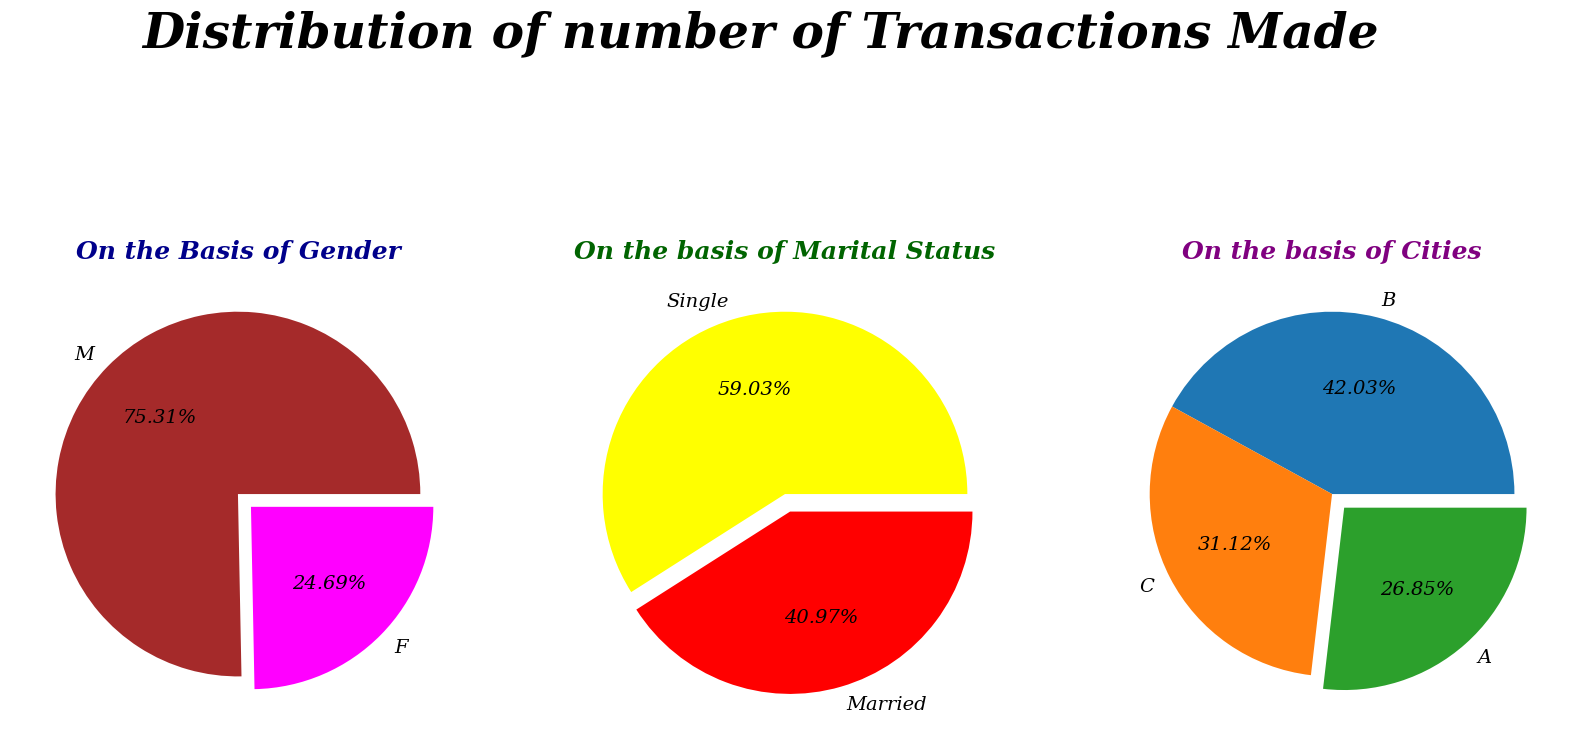

In [48]:
# Distribution of number of Transactions :
plt.figure(figsize = (20, 10))
plt.suptitle('Distribution of number of Transactions Made', fontsize = 35, fontweight = 600, fontfamily = 'serif', fontstyle = 'oblique')
plt.subplot(1, 3, 1)
plt.title('On the Basis of Gender', color = 'darkblue', fontdict = {'fontsize' : 18,
                                                'fontweight' : 600,
                                                'fontstyle' : 'oblique',
                                                'fontfamily' : 'serif'})
df_gender_dist = np.round(df['Gender'].value_counts(normalize = True) * 100, 2)
plt.pie(x = df_gender_dist.values, labels = df_gender_dist.index, 
        explode = [0, 0.1], autopct = '%.2f%%', 
       textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500},
       colors = ['brown', 'magenta'])
plt.plot()
plt.subplot(1, 3, 2)
plt.title('On the basis of Marital Status', color = 'darkgreen', fontdict = {'fontsize' : 18,
                                                'fontweight' : 600,
                                                'fontstyle' : 'oblique',
                                                'fontfamily' : 'serif'})
df_Marital_Status_dist = np.round(df['Marital_Status'].value_counts(normalize = True) * 100, 2)
plt.pie(x = df_Marital_Status_dist.values, labels = df_Marital_Status_dist.index, 
        explode = [0, 0.1], autopct = '%.2f%%', 
       textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500},
       colors = ['yellow', 'red'])
plt.plot()
plt.subplot(1, 3, 3)
plt.title("On the basis of Cities", color = 'purple', fontdict = {'fontsize' : 18,
                                                'fontweight' : 555,
                                                'fontstyle' : 'oblique',
                                                'fontfamily' : 'serif'})
df_City_Category_dist = np.round(df['City_Category'].value_counts(normalize = True) * 100, 2)
plt.pie(x = df_City_Category_dist.values, labels = df_City_Category_dist.index, 
        explode = [0, 0, 0.1], autopct = '%.2f%%', 
       textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500})
plt.plot()
plt.show()

# Visual Analysis - Univariate & Bivariate

## Univariate Analysis

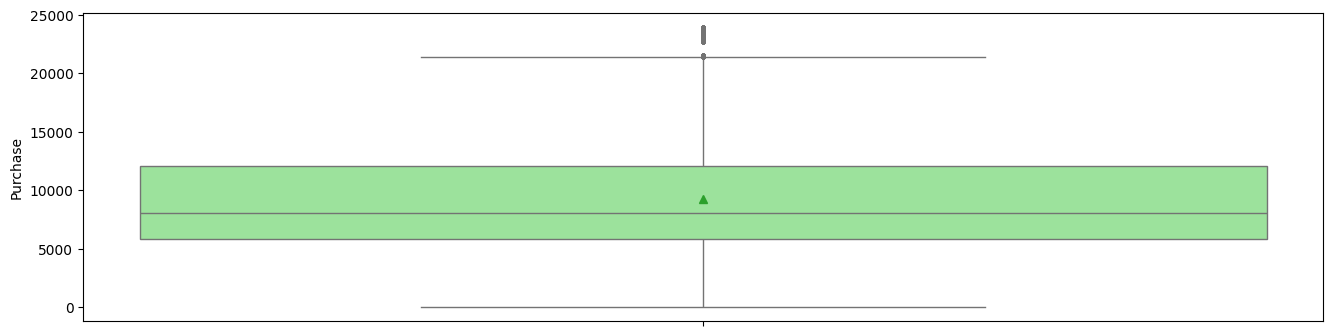

In [51]:
plt.figure(figsize = (16, 4))
sns.boxplot(data = df, 
            y = 'Purchase', 
            showmeans = True, 
            fliersize = 2, 
            width = 0.5, 
            color = np.random.choice(['pink', 'lightgreen', 'cyan']))
plt.xticks(np.arange(0, 25001, 2000))
plt.plot()
plt.show()

#### Insight - From the above boxplot we can say that most of the purchase is between 5000-12000.

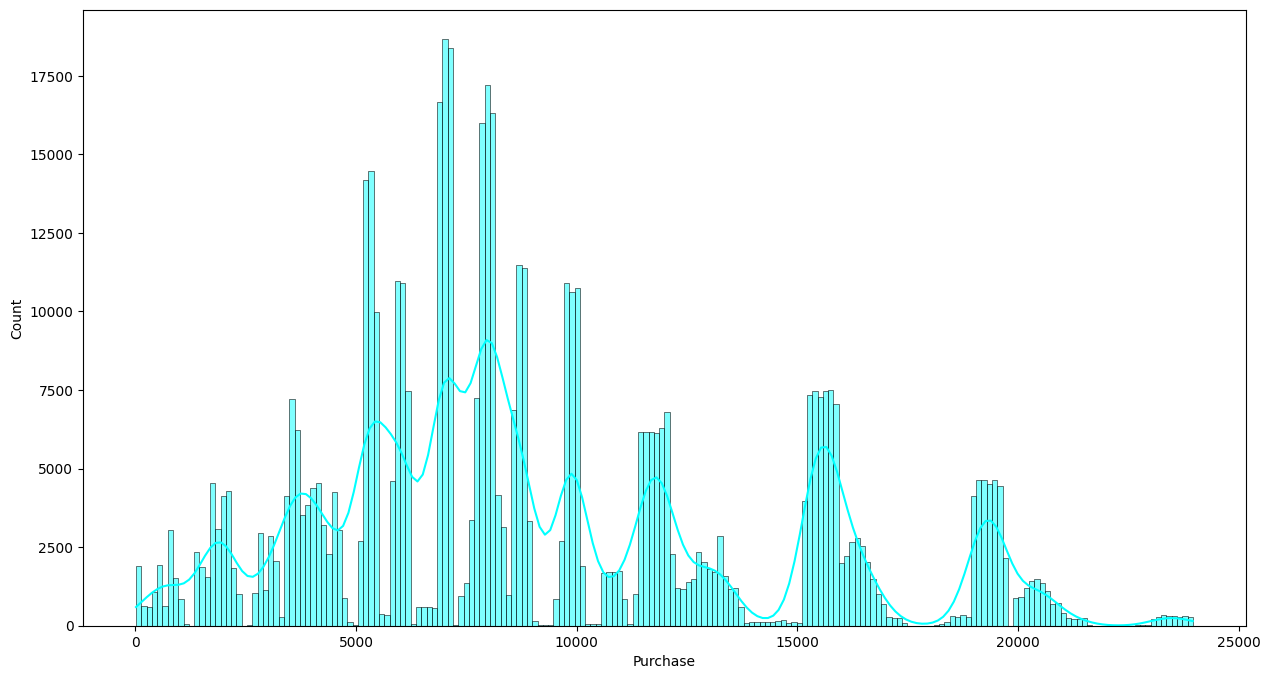

In [52]:
plt.figure(figsize = (15, 8))
sns.histplot(data = df, x = 'Purchase', kde = True, bins = 200, color = 'cyan')
plt.show()

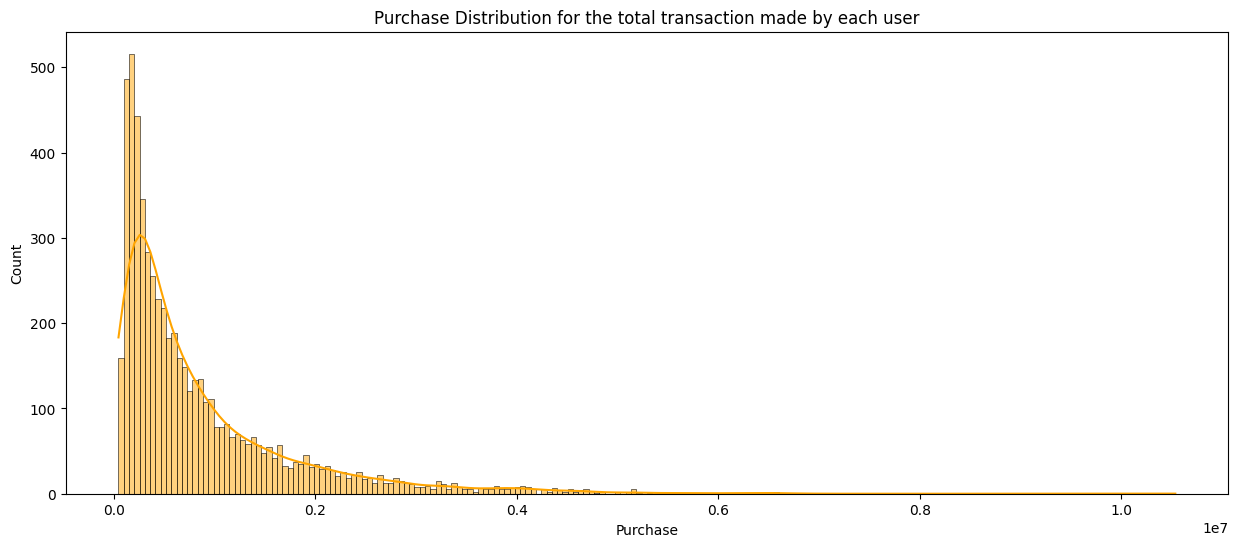

In [53]:
plt.figure(figsize = (15, 6))
plt.title('Purchase Distribution for the total transaction made by each user')
df_customer = df.groupby(by = 'User_ID')['Purchase'].sum()
sns.histplot(data = df_customer, kde = True, bins = 200,color = 'orange')
plt.plot()
plt.show()

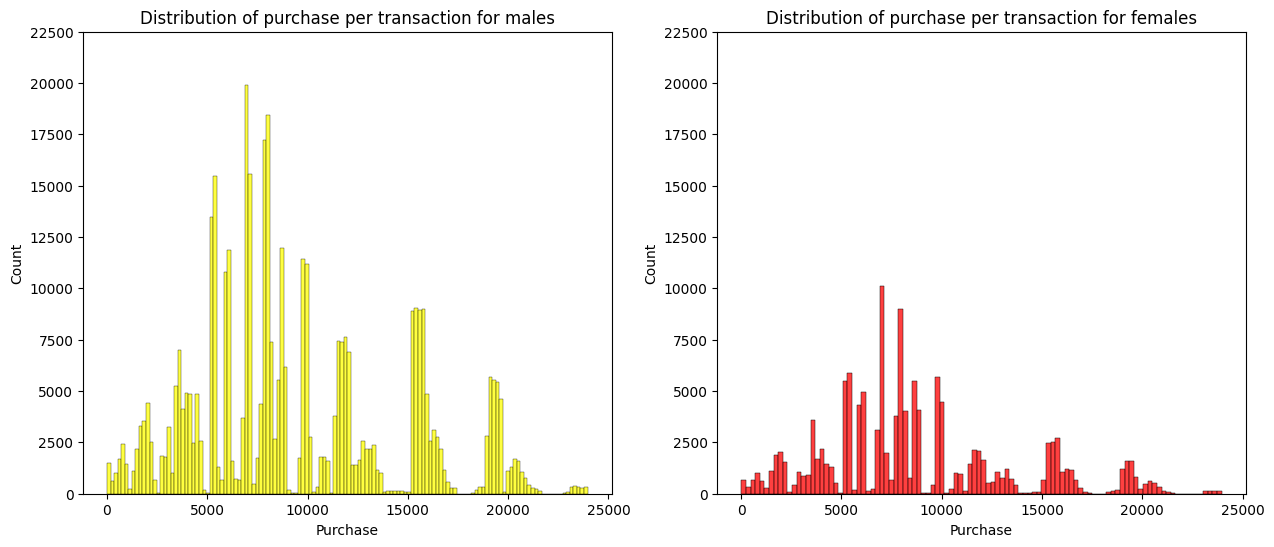

In [54]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.title('Distribution of purchase per transaction for males')
df_male = df[df['Gender'] == 'M']
sns.histplot(data = df_male, x = 'Purchase',color = 'yellow')
plt.yticks(np.arange(0, 22550, 2500))
plt.subplot(1, 2 ,2)
plt.title('Distribution of purchase per transaction for females')
df_female = df[df['Gender'] == 'F']
sns.histplot(data = df_female, x = 'Purchase',color = 'red')
plt.yticks(np.arange(0, 22550, 2500))
plt.show()

#### Insight - From the above plots we can conclude that purchase per transaction for males is higher than females.

In [55]:
df_cust_gender = pd.DataFrame(df.groupby(by = ['Gender', 'User_ID'])['Purchase'].sum()).reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_cust_gender

,Gender,User_ID,Total_Purchase
0,F,1000001,334093
1,F,1000006,379930
2,F,1000010,2169510
3,F,1000011,557023
4,F,1000016,150490
...,...,...,...
5886,M,1006030,737361
5887,M,1006032,517261
5888,M,1006033,501843
5889,M,1006034,197086


In [56]:
df_male_customer = df_cust_gender.loc[df_cust_gender['Gender'] == 'M']
df_female_customer = df_cust_gender.loc[df_cust_gender['Gender'] == 'F']


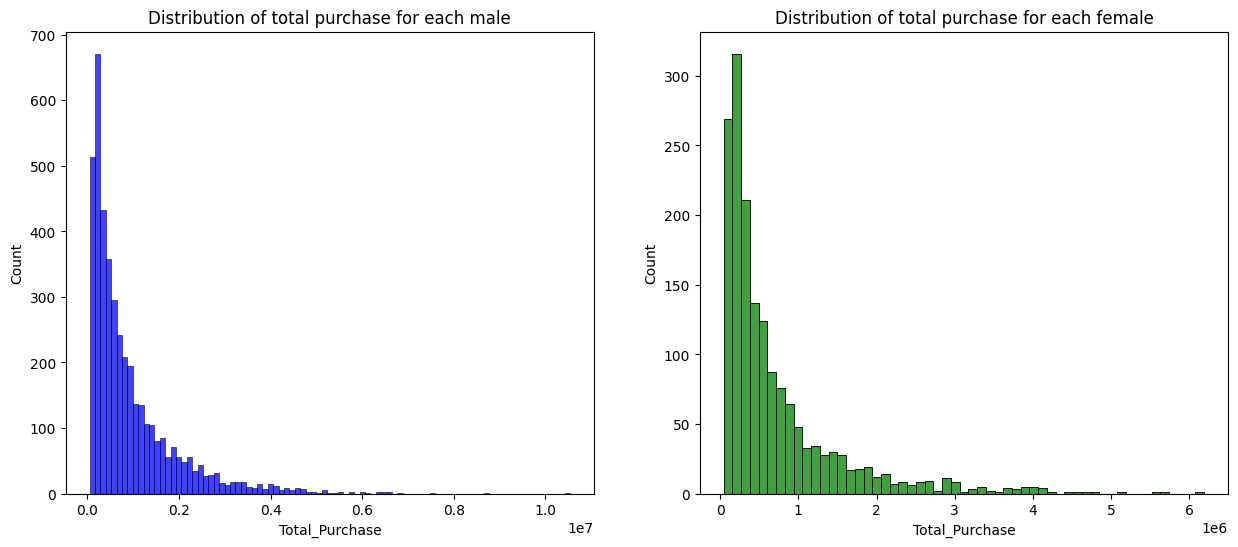

In [57]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.title('Distribution of total purchase for each male')
sns.histplot(data = df_male_customer, x = 'Total_Purchase',color = 'blue')
plt.subplot(1, 2 ,2)
plt.title('Distribution of total purchase for each female')
df_female = df[df['Gender'] == 'F']
sns.histplot(data = df_female_customer, x = 'Total_Purchase',color = 'green')
plt.show()

#### Insight - The maximum total purchase for each male is around 700 while for females it is around 350.

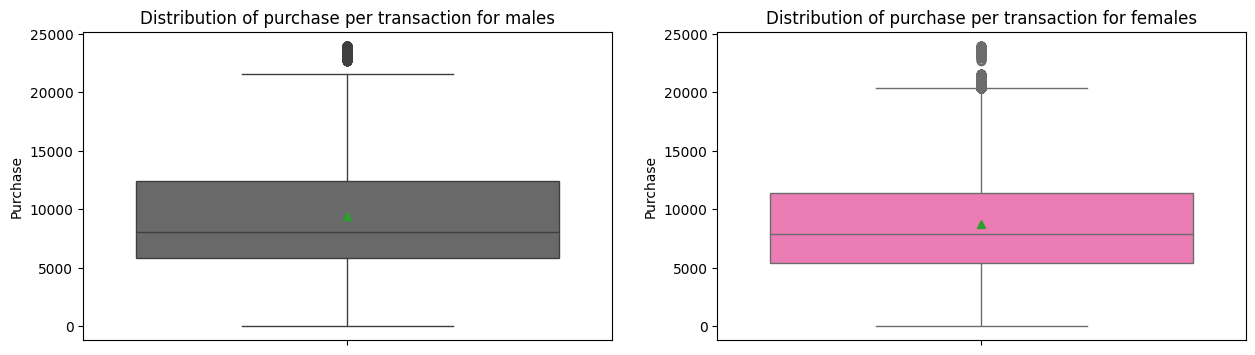

In [58]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
plt.title('Distribution of purchase per transaction for males')
sns.boxplot(data = df_male, y = 'Purchase', showmeans = True, color = 'dimgray')
plt.subplot(1, 2 ,2)
plt.title('Distribution of purchase per transaction for females')
sns.boxplot(data = df_female, y = 'Purchase', showmeans = True, color = 'hotpink')
plt.show()

#### Insight - The outliers for purchase per transaction for both male and females were found to be above and around 2000.

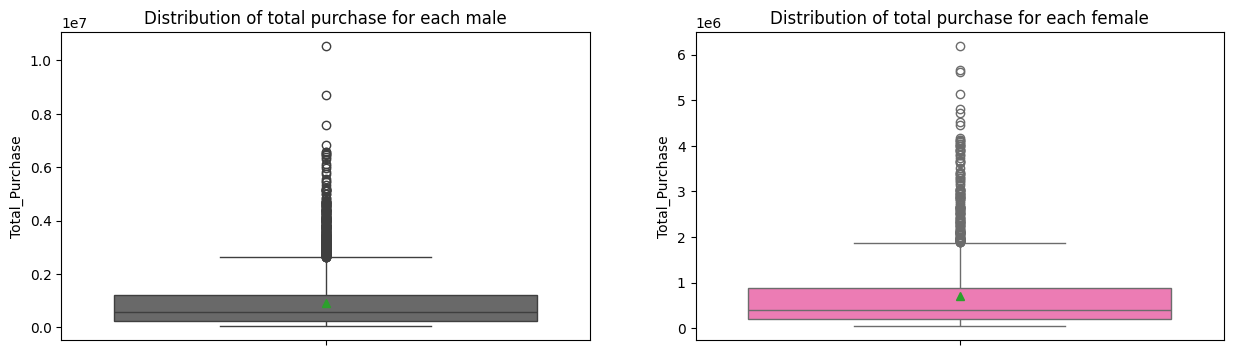

In [59]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
plt.title('Distribution of total purchase for each male')
sns.boxplot(data = df_male_customer, y = 'Total_Purchase', showmeans = True, color = 'dimgray')
plt.subplot(1, 2 ,2)
plt.title('Distribution of total purchase for each female')
sns.boxplot(data = df_female_customer, y = 'Total_Purchase', showmeans = True, color = 'hotpink')
plt.show()


#### Insight - We found that outliers for total purchase for each male were above 0.2 and for females outliers were above 2.

In [60]:
df['Age'].unique()

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

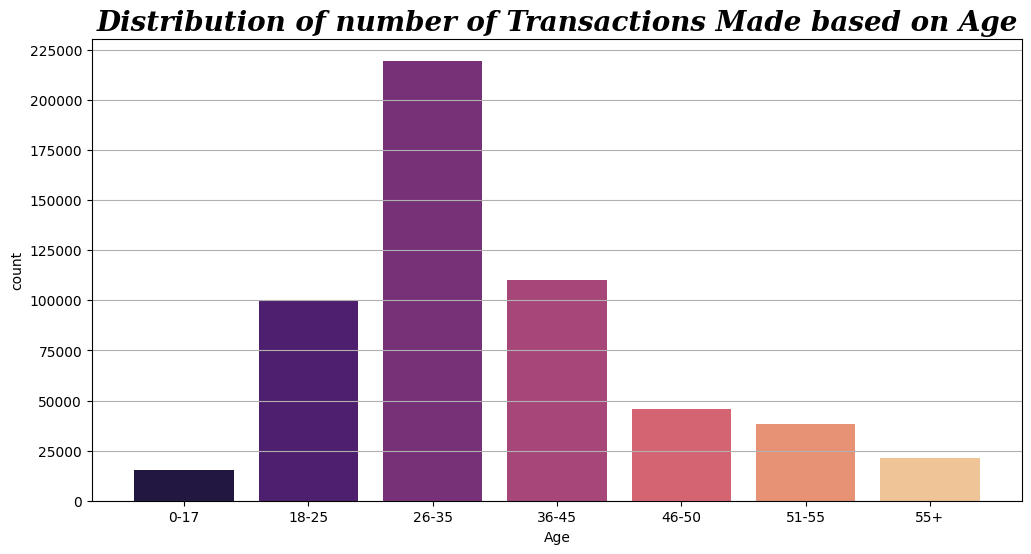

In [61]:
plt.figure(figsize = (12, 6))
plt.title('Distribution of number of Transactions Made based on Age', 
          fontsize = 20, 
          fontweight = 600, 
          fontstyle = 'oblique', 
          fontfamily = 'serif')
plt.yticks(np.arange(0, 250001, 25000))
plt.grid('y')
sns.countplot(data = df, x = 'Age', 
              order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'], palette = "magma")
plt.plot()
plt.show()

#### Insight - The above countplot shows that the customers in the age group 26-35 have made the maximum transactions.

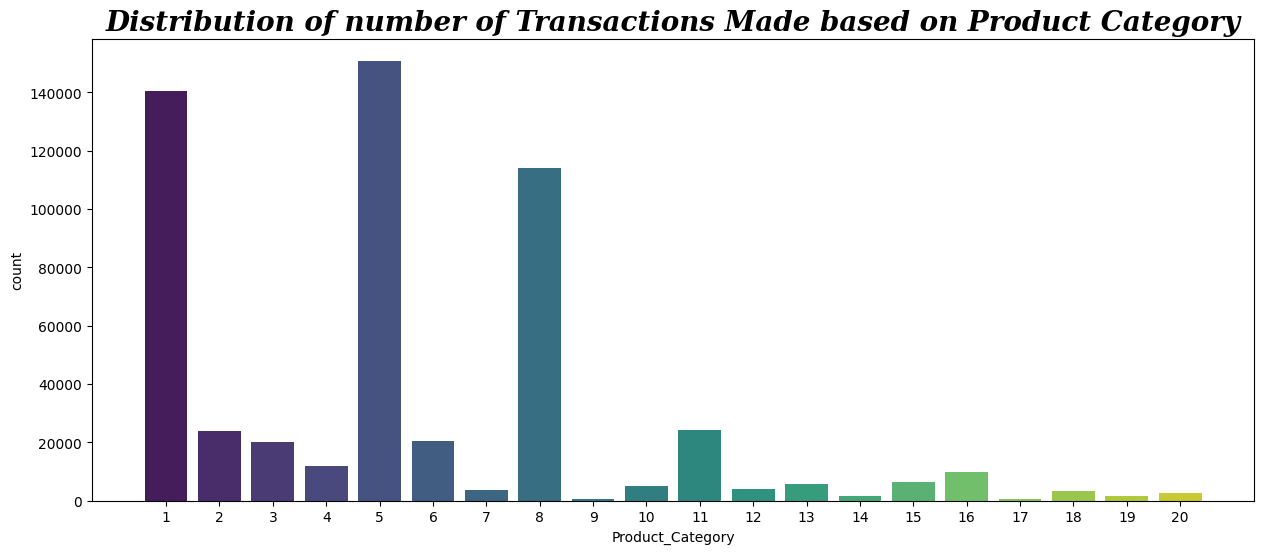

In [62]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of number of Transactions Made based on Product Category', fontsize = 20, fontweight = 600, fontstyle = 'oblique', fontfamily = 'serif')
sns.countplot(data = df, x = 'Product_Category',palette = "viridis")
plt.plot()
plt.show()

#### Insight - We can conclude that product category 5 have made most of the transactions.

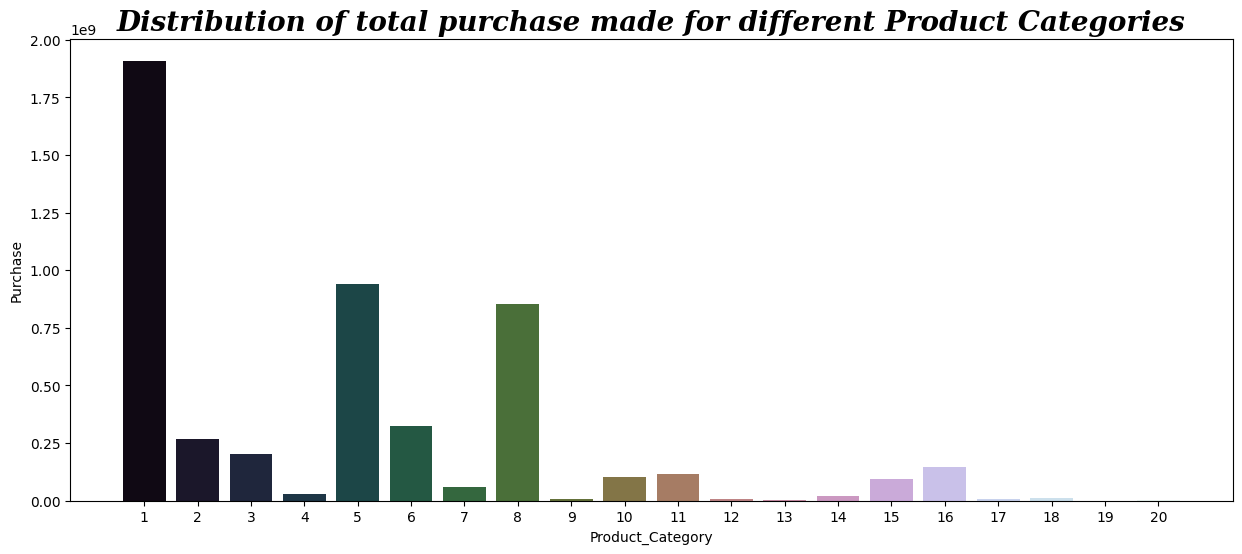

In [63]:
df_product_category = df.groupby(by = 'Product_Category')['Purchase'].sum().to_frame().reset_index()
plt.figure(figsize = (15, 6))
plt.title('Distribution of total purchase made for different Product Categories', 
          fontsize = 20, 
          fontweight = 600, 
          fontstyle = 'oblique', 
          fontfamily = 'serif')
sns.barplot(data = df_product_category, x = 'Product_Category', y = 'Purchase',palette = "cubehelix")
plt.plot()
plt.show()

#### Insight - We can conclude that product category 1 have contributed the most in the total purchase.

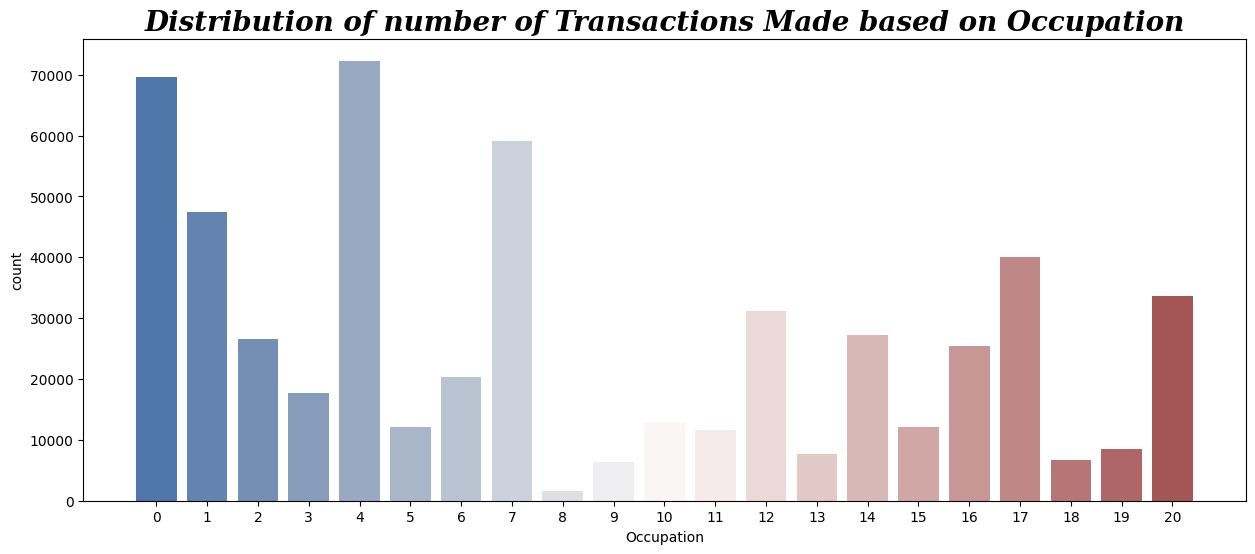

In [64]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of number of Transactions Made based on Occupation', 
          fontsize = 20, 
          fontweight = 600, 
          fontstyle = 'oblique', 
          fontfamily = 'serif')
sns.countplot(data = df, x = 'Occupation',palette = "vlag")
plt.plot()
plt.show()

#### Insight - We found that maximum number of transactions were made by customers in the occupation 4.

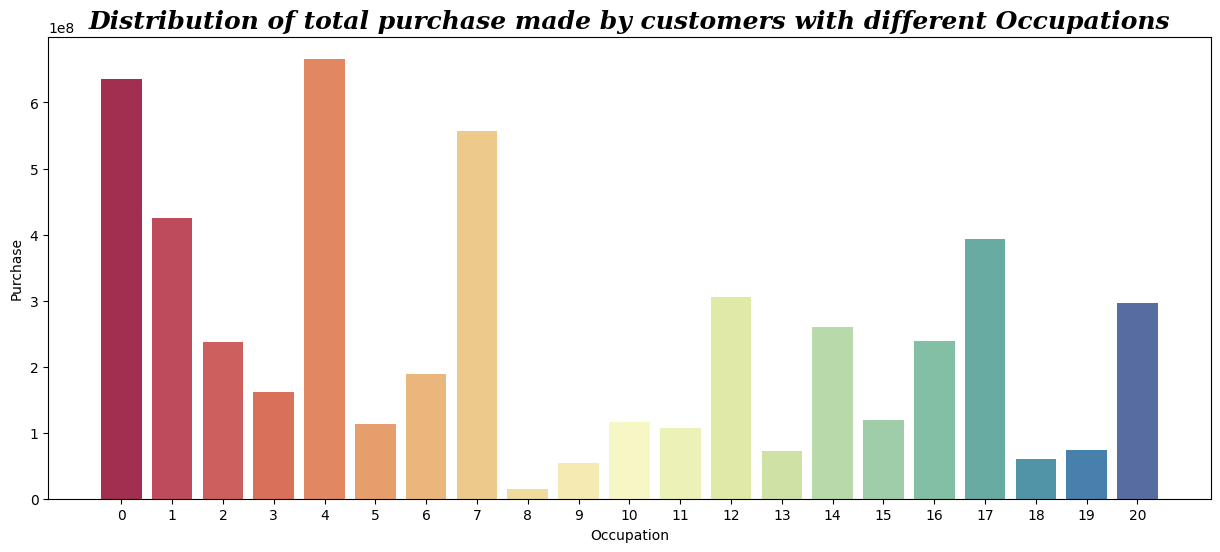

In [65]:
df_occupation = df.groupby(by = 'Occupation')['Purchase'].sum().to_frame().reset_index()
plt.figure(figsize = (15, 6))
plt.title('Distribution of total purchase made by customers with different Occupations', 
          fontsize = 18, 
          fontweight = 600, 
          fontstyle = 'oblique', 
          fontfamily = 'serif')
sns.barplot(data = df_occupation, x = 'Occupation', y = 'Purchase',palette = "Spectral")
plt.plot()
plt.show()

#### Insight - Customers with occupation 4 have contributed the most in the total purcahse made by walmart.

## Bivariate Analysis

### For categorical variable(s):Boxplot

#### Outlier Detection using Boxplot

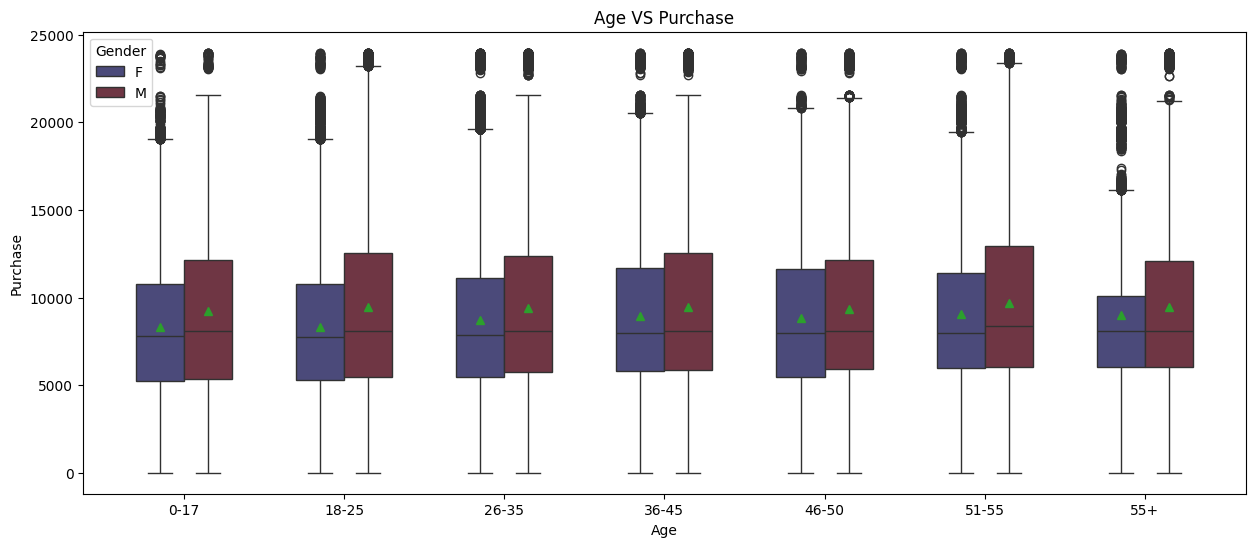

In [20]:
plt.figure(figsize = (15, 6))
sns.boxplot(data = df, x = 'Age', y = 'Purchase', hue = 'Gender', showmeans = True, width = 0.6,palette = "icefire")
plt.title('Age VS Purchase')
plt.plot()
plt.show()

#### Insight - From the above boxplot we can observe that outliers for all the age groups except 55+  are around 20000 while for the 55+ outliers are around 15000.

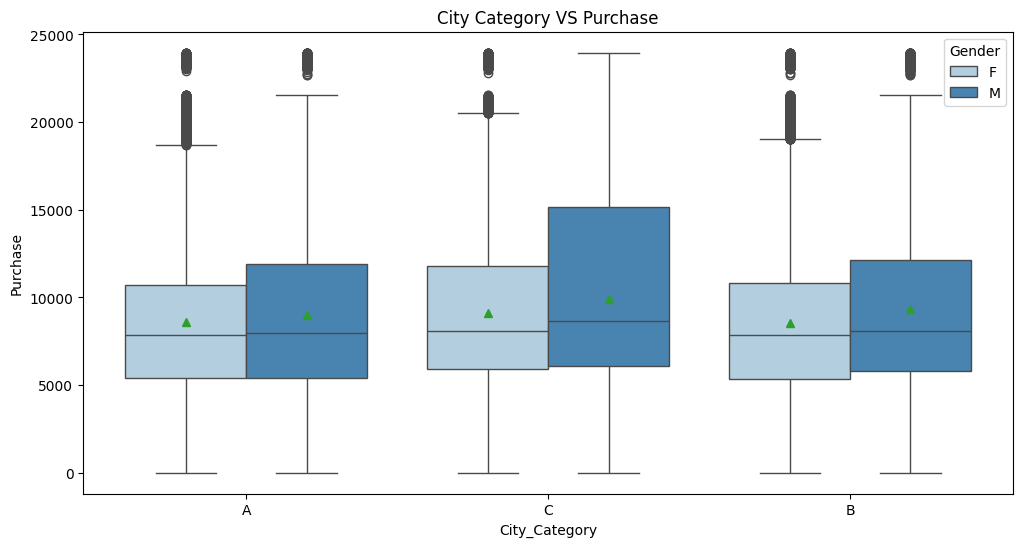

In [9]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = df, x = 'City_Category', y = 'Purchase', hue = 'Gender', showmeans = True,palette = "Blues")
plt.title('City Category VS Purchase')
plt.plot()
plt.show()

#### Insight - The boxplot for analysing the city category showed that males from all 3 cities made more purcahse than females & we have outliers around 20000.

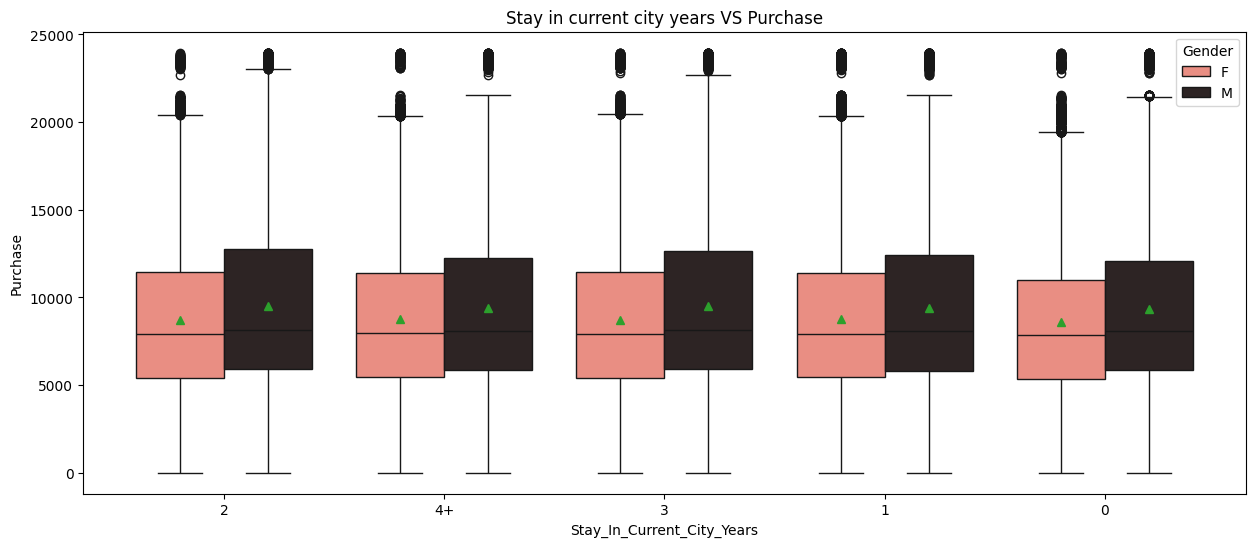

In [10]:
plt.figure(figsize = (15, 6))
sns.boxplot(data = df, x = 'Stay_In_Current_City_Years', y = 'Purchase', hue = 'Gender', showmeans = True,palette = "dark:salmon_r")
plt.title('Stay in current city years VS Purchase')
plt.plot()
plt.show()

#### Insight - The above boxplot shows that males who lived in the city for 2 years made the most purchase & we have outliers around or above 20000.

# Answering questions 

# Determining the mean purchase made by each user

## FOR GENDER

### For Males

#### How the deviations vary for different sample sizes ?

In [74]:
df_male_customer

,Gender,User_ID,Total_Purchase
1666,M,1000002,810472
1667,M,1000003,341635
1668,M,1000004,206468
1669,M,1000005,821001
1670,M,1000007,234668
...,...,...,...
5886,M,1006030,737361
5887,M,1006032,517261
5888,M,1006033,501843
5889,M,1006034,197086


In [75]:
# The code snippet performs a loop to calculate the mean purchase for different 
    # sample sizes of male customers
    
mean_purchases = []
for sample_size in range(50, 4000):
    sample_mean = df_male_customer['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)

# It iterates over a range of sample sizes from 50 to 4000, and for each iteration, 
    # it takes a random sample of the specified size from the 'Total_Purchase' column 
    # of the 'df_male_customer' DataFrame and calculates the mean of the sampled values. 
    # The calculated mean values are then stored in the 'mean_purchases' list.

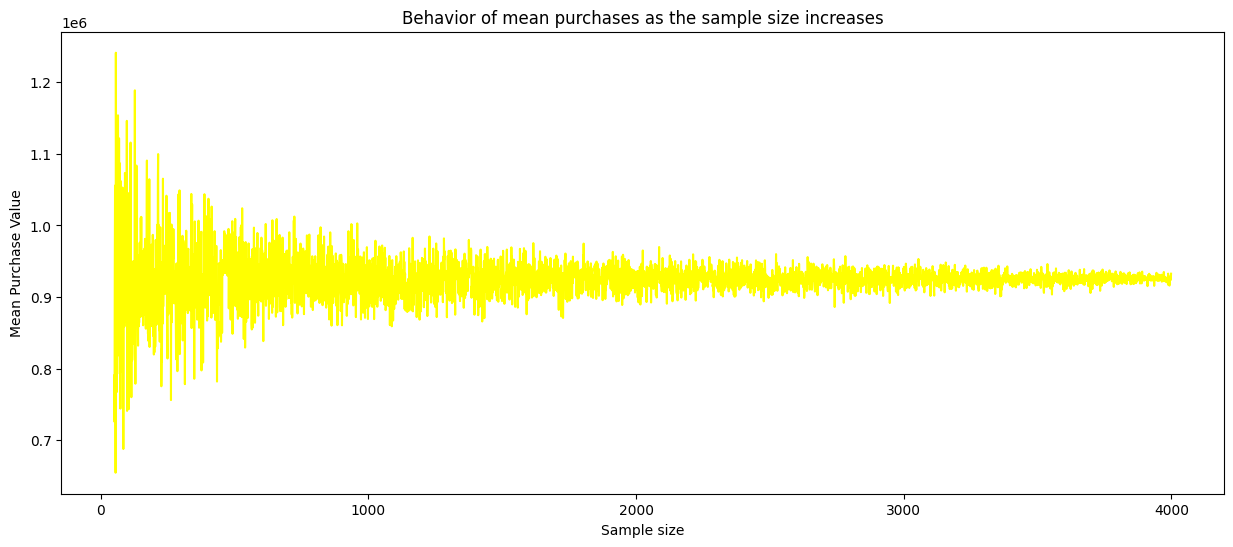

In [76]:
# Creating a plot using matplotlib to visualize the trend of the mean purchases 
    # as the sample size increases 
    
plt.figure(figsize = (15, 6))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 4000), mean_purchases,color = 'yellow')
plt.xticks(np.arange(0, 10001, 1000))
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()
plt.show()

#### Finding the confidence interval of each male's total spending on the Black Friday

In [77]:
means_male = []
size = df_male_customer['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = df_male_customer['Total_Purchase'].sample(size, replace = True).mean()
    means_male.append(sample_mean)

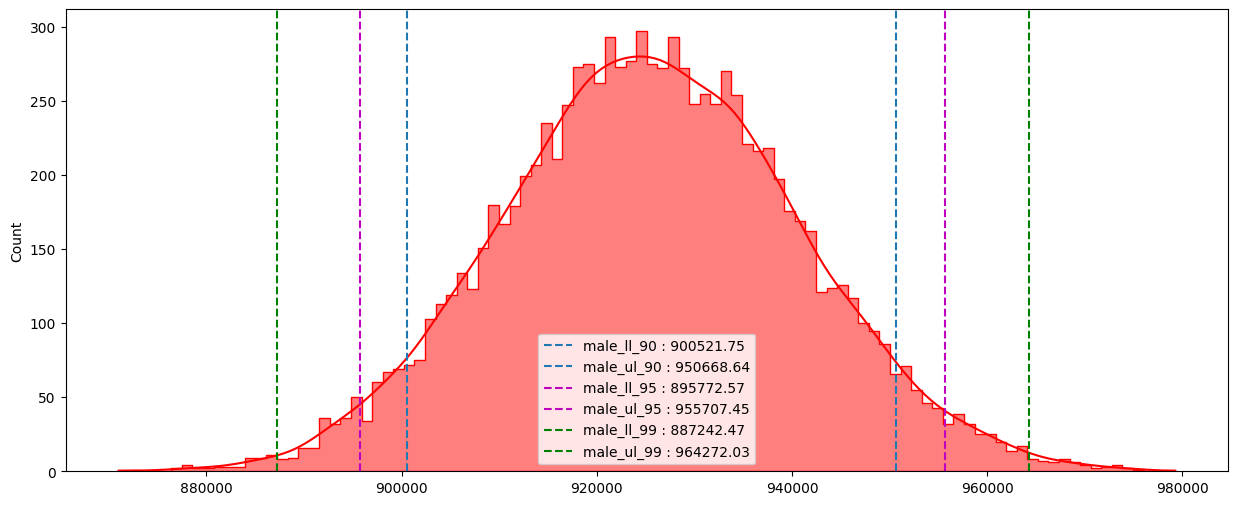

In [78]:
# The below code generates a histogram plot with kernel density estimation and 
    # adds vertical lines to represent confidence intervals at 90%, 95%, and 99% level

plt.figure(figsize = (15, 6))     # setting the figure size of the plot

sns.histplot(means_male, kde = True, bins = 100, fill = True, element = 'step',color = 'red')

# Above line plots a histogram of the data contained in the `means_male` variable. 
    # The `kde=True` argument adds a kernel density estimation line to the plot. 
    # The `bins=100` argument sets the number of bins for the histogram
    

# Above line calculates the z-score corresponding to the 90% confidence level using the 
    # inverse of the cumulative distribution function (CDF) of a standard normal distribution
    
male_ll_90 = np.percentile(means_male, 5)
    # calculating the lower limit of the 90% confidence interval
male_ul_90 = np.percentile(means_male, 95)
    # calculating the upper limit of the 90% confidence interval
plt.axvline(male_ll_90, label = f'male_ll_90 : {round(male_ll_90, 2)}', linestyle = '--')
    # adding a vertical line at the lower limit of the 90% confidence interval
plt.axvline(male_ul_90, label = f'male_ul_90 : {round(male_ul_90, 2)}', linestyle = '--')
    # adding a vertical line at the upper limit of the 90% confidence interval
    
# Similar steps are repeated for calculating and plotting the 95% and 99% confidence intervals, 
    # with different line colors (`color='m'` for 95% and `color='g'` for 99%)

male_ll_95 = np.percentile(means_male, 2.5)
male_ul_95 = np.percentile(means_male, 97.5)
plt.axvline(male_ll_95, label = f'male_ll_95 : {round(male_ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(male_ul_95, label = f'male_ul_95 : {round(male_ul_95, 2)}', linestyle = '--', color = 'm')


male_ll_99 = np.percentile(means_male, 0.5)
male_ul_99 = np.percentile(means_male, 99.5)
plt.axvline(male_ll_99, label = f'male_ll_99 : {round(male_ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(male_ul_99, label = f'male_ul_99 : {round(male_ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()     
plt.plot()
plt.show()

In [79]:
print(f"The population mean of total spending of each male will be approximately = {np.round(np.mean(means_male), 2)} ")


The population mean of total spending of each male will be approximately = 925495.16 


#### Inisght - Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each male customer on Black Friday at Walmart, despite having data for only 4225 male individuals. This provides us with a reasonable approximation of the range within which the total purchase of each male customer falls, with a certain level of confidence.

### Question - Confidence intervals and distribution of the mean of the expenses by male customers.
### Answer - The population mean of total spending of each male is approximately = 925495.16 

### For Females

#### How the deviations vary for different sample sizes ?

In [80]:
df_female_customer

,Gender,User_ID,Total_Purchase
0,F,1000001,334093
1,F,1000006,379930
2,F,1000010,2169510
3,F,1000011,557023
4,F,1000016,150490
...,...,...,...
1661,F,1006035,956645
1662,F,1006036,4116058
1663,F,1006037,1119538
1664,F,1006038,90034


In [81]:
# The code snippet performs a loop to calculate the mean purchase for different 
    # sample sizes of female customers

mean_purchases = []
for sample_size in range(50, 1600):
    sample_mean = df_female_customer['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)
    
# It iterates over a range of sample sizes from 50 to 1600, and for each iteration, 
    # it takes a random sample of the specified size from the 'Total_Purchase' column 
    # of the 'df_female_customer' DataFrame and calculates the mean of the sampled values. 
    # The calculated mean values are then stored in the 'mean_purchases' list.

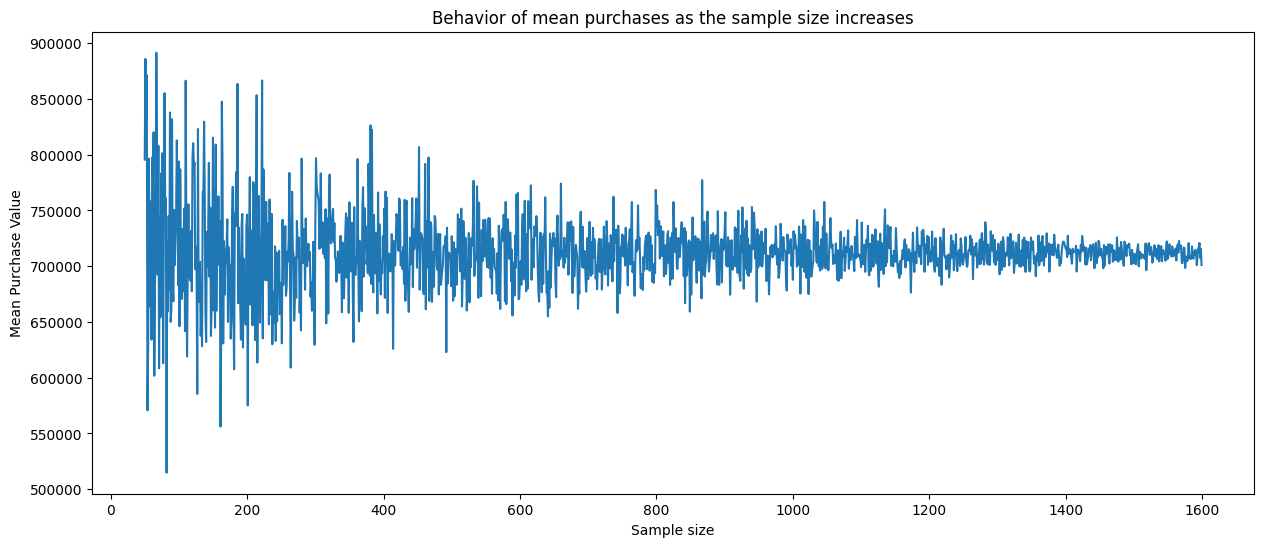

In [82]:
# Creating a plot using matplotlib to visualize the trend of the mean purchases 
    # as the sample size increases

plt.figure(figsize = (15, 6))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 1600), mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()
plt.show()

#### Finding the confidence interval of each female's total spending on the Black Friday


In [83]:
means_female = []
size = df_female_customer['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = df_female_customer['Total_Purchase'].sample(size, replace = True).mean()
    means_female.append(sample_mean)

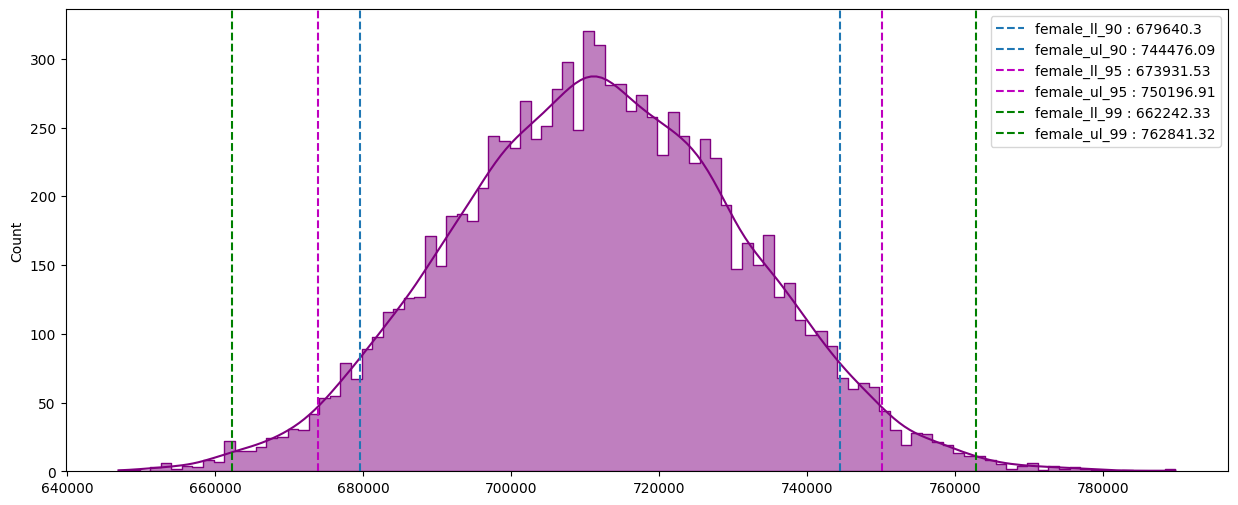

In [84]:
# The below code generates a histogram plot with kernel density estimation and 
    # adds vertical lines to represent confidence intervals at 90%, 95%, and 99% level

plt.figure(figsize = (15, 6))     # setting the figure size of the plot

sns.histplot(means_female, kde = True, bins = 100, fill = True, element = 'step',color = 'purple')

# Above line plots a histogram of the data contained in the `means_female` variable. 
    # The `kde=True` argument adds a kernel density estimation line to the plot. 
    # The `bins=100` argument sets the number of bins for the histogram
    

# Above line calculates the z-score corresponding to the 90% confidence level using the 
    # inverse of the cumulative distribution function (CDF) of a standard normal distribution
    
female_ll_90 = np.percentile(means_female, 5)
    # calculating the lower limit of the 90% confidence interval
female_ul_90 = np.percentile(means_female, 95)
    # calculating the upper limit of the 90% confidence interval
plt.axvline(female_ll_90, label = f'female_ll_90 : {round(female_ll_90, 2)}', linestyle = '--')
    # adding a vertical line at the lower limit of the 90% confidence interval
plt.axvline(female_ul_90, label = f'female_ul_90 : {round(female_ul_90, 2)}', linestyle = '--')
    # adding a vertical line at the upper limit of the 90% confidence interval
    
# Similar steps are repeated for calculating and plotting the 95% and 99% confidence intervals, 
    # with different line colors (`color='m'` for 95% and `color='g'` for 99%)
female_ll_95 = np.percentile(means_female, 2.5)
female_ul_95 = np.percentile(means_female, 97.5)
plt.axvline(female_ll_95, label = f'female_ll_95 : {round(female_ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(female_ul_95, label = f'female_ul_95 : {round(female_ul_95, 2)}', linestyle = '--', color = 'm')


female_ll_99 = np.percentile(means_female, 0.5)
female_ul_99 = np.percentile(means_female, 99.5)
plt.axvline(female_ll_99, label = f'female_ll_99 : {round(female_ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(female_ul_99, label = f'female_ul_99 : {round(female_ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()     
plt.plot()
plt.show()

In [85]:
print(f"The population mean of total spending of each female will be approximately = {np.round(np.mean(means_female), 2)} ")


The population mean of total spending of each female will be approximately = 711892.46 


#### Inisght - Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each female customer on Black Friday at Walmart, despite having data for only 1666 female individuals. This provides us with a reasonable approximation of the range within which the total purchase of each female customer falls, with a certain level of confidence.

### Question - Confidence intervals and distribution of the mean of the expenses by female customers.
### Answer - The population mean of total spending of each female is approximately = 711892.46 


#### Comparison of distributions of male's total purchase amount and female's total purchase amount

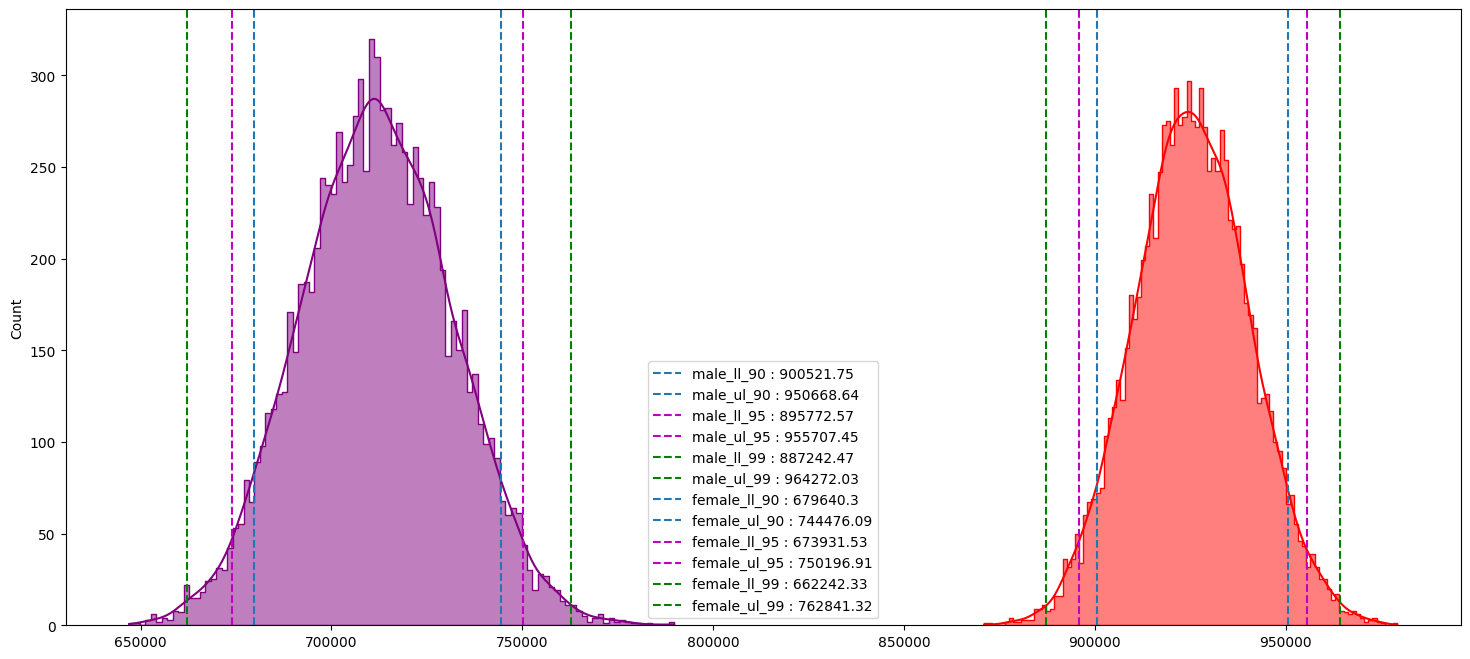

In [86]:
# The code generates a histogram plot to visualize the distributions of means_male and means_female,
    # along with vertical lines indicating confidence interval limits at different confidence levels
    
plt.figure(figsize = (18, 8))

# The first histogram represents the distribution of means_male with gray color having 
    # KDE (Kernel Density Estimation) curves enabled for smooth representation.
sns.histplot(means_male, 
             kde = True, 
             bins = 100, 
             fill = True, 
             element = 'step', 
             color = 'red',
             legend = True)

# Multiple vertical lines are plotted to represent the lower and upper limits 
    # for confidence intervals at different confidence levels
plt.axvline(male_ll_90, label = f'male_ll_90 : {round(male_ll_90, 2)}', linestyle = '--')
plt.axvline(male_ul_90, label = f'male_ul_90 : {round(male_ul_90, 2)}', linestyle = '--')
plt.axvline(male_ll_95, label = f'male_ll_95 : {round(male_ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(male_ul_95, label = f'male_ul_95 : {round(male_ul_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(male_ll_99, label = f'male_ll_99 : {round(male_ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(male_ul_99, label = f'male_ul_99 : {round(male_ul_99, 2)}', linestyle = '--', color = 'g')
# The second histogram represents the distribution of means_female with magenta color
    # KDE (Kernel Density Estimation) curves enabled for smooth representation.
sns.histplot(means_female, 
             kde = True, 
             bins = 100, 
             fill = True, 
             element = 'step', 
             color = 'purple',
             legend = True)

# Multiple vertical lines are plotted to represent the lower and upper limits 
    # for confidence intervals at different confidence levels
plt.axvline(female_ll_90, label = f'female_ll_90 : {round(female_ll_90, 2)}', linestyle = '--')
plt.axvline(female_ul_90, label = f'female_ul_90 : {round(female_ul_90, 2)}', linestyle = '--')
plt.axvline(female_ll_95, label = f'female_ll_95 : {round(female_ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(female_ul_95, label = f'female_ul_95 : {round(female_ul_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(female_ll_99, label = f'female_ll_99 : {round(female_ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(female_ul_99, label = f'female_ul_99 : {round(female_ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()
plt.plot()
plt.show()

#### Insight - It can be clearly seen from the above chart that the distribution of males' total purchase amount lies well towards the right of females' total purchase amount. We can conclude that, on average, males tend to spend more on purchases compared to females.

### Question - Are women spending more money per transaction than men? Why or Why not?
### Answer  - The population mean of total spending of each female is approximately 711892.46 while for each male its is approximately 925495.16   therefore we can say that male spends more money than females.

### Question - Are confidence intervals of average male and female customers spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?
### Answer - No, the confidence intervals of average male and female customers spending are not overlapping.It suggests a significant spending difference. In this case, Walmart can tailor marketing strategies, product assortments, and promotions to better target and appeal to the specific preferences of each gender, optimizing their approach for higher sales and customer satisfaction.

In [106]:
df_single = df.loc[df['Marital_Status'] == 'Single']
df_married = df.loc[df['Marital_Status'] == 'Married']

In [107]:
df_single = df_single.groupby('User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_married = df_married.groupby('User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})


## FOR MARITAL STATUS

### For Singles

In [89]:
df_single

,User_ID,Total_Purchase
0,1000001,334093
1,1000002,810472
2,1000003,341635
3,1000006,379930
4,1000009,594099
...,...,...
3412,1006034,197086
3413,1006035,956645
3414,1006037,1119538
3415,1006038,90034


#### How the deviations vary for different sample sizes ?


In [90]:
# The code snippet performs a loop to calculate the mean purchase for different 
    # sample sizes of customers with matrital status as single

mean_purchases = []
for sample_size in range(50, 3000):
    sample_mean = df_single['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)
    
# It iterates over a range of sample sizes from 50 to 3000, and for each iteration, 
    # it takes a random sample of the specified size from the 'Total_Purchase' column 
    # of the 'df_single' DataFrame and calculates the mean of the sampled values. 
    # The calculated mean values are then stored in the 'mean_purchases' list.

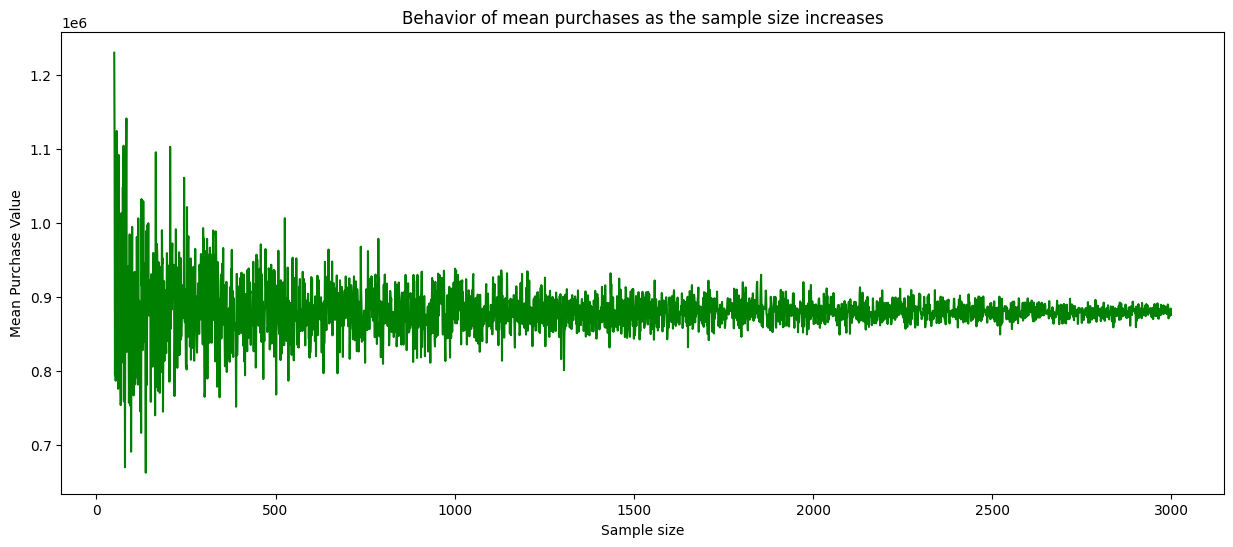

In [91]:
# Creating a plot using matplotlib to visualize the trend of the mean purchases 
    # as the sample size increases

plt.figure(figsize = (15, 6))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 3000), mean_purchases,color = 'green')
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()
plt.show()

#### Finding the confidence interval of each single's total spending on the Black Friday

In [92]:
single_means = []
size = df_single['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = df_single['Total_Purchase'].sample(size, replace = True).mean()
    single_means.append(sample_mean)

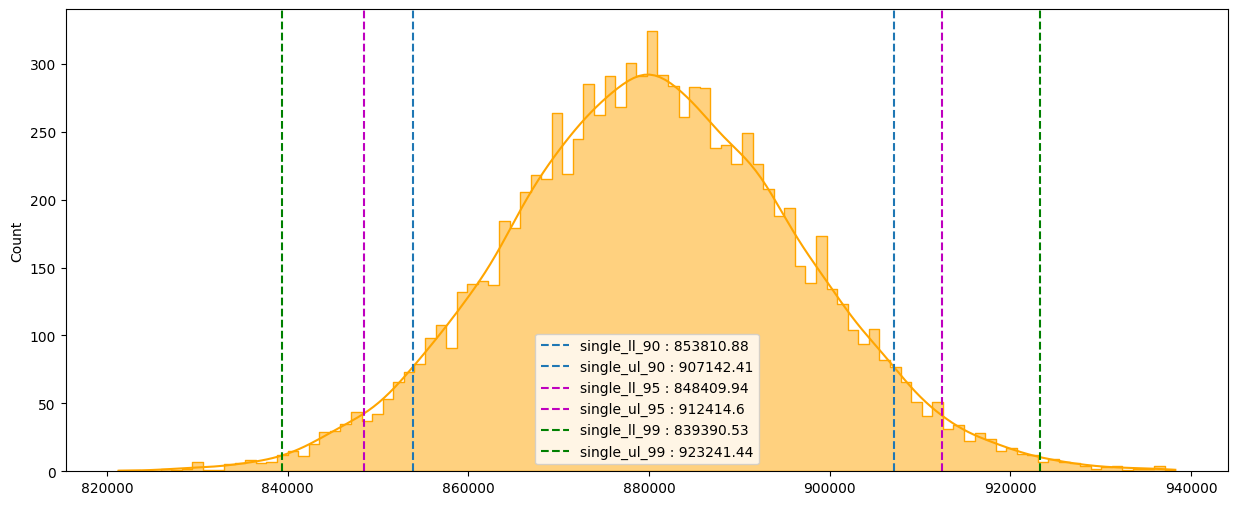

In [93]:
# The below code generates a histogram plot with kernel density estimation and 
    # adds vertical lines to represent confidence intervals at 90%, 95%, and 99% level

plt.figure(figsize = (15, 6))     # setting the figure size of the plot

sns.histplot(single_means, kde = True, bins = 100, fill = True, element = 'step',color = 'orange')

# Above line plots a histogram of the data contained in the `single_means` variable. 
    # The `kde=True` argument adds a kernel density estimation line to the plot. 
    # The `bins=100` argument sets the number of bins for the histogram
    

# Above line calculates the z-score corresponding to the 90% confidence level using the 
    # inverse of the cumulative distribution function (CDF) of a standard normal distribution
    
single_ll_90 = np.percentile(single_means, 5)
    # calculating the lower limit of the 90% confidence interval
single_ul_90 = np.percentile(single_means, 95)
    # calculating the upper limit of the 90% confidence interval
plt.axvline(single_ll_90, label = f'single_ll_90 : {round(single_ll_90, 2)}', linestyle = '--')
    # adding a vertical line at the lower limit of the 90% confidence interval
plt.axvline(single_ul_90, label = f'single_ul_90 : {round(single_ul_90, 2)}', linestyle = '--')
    # adding a vertical line at the upper limit of the 90% confidence interval
    
# Similar steps are repeated for calculating and plotting the 95% and 99% confidence intervals, 
    # with different line colors (`color='m'` for 95% and `color='g'` for 99%)

single_ll_95 = np.percentile(single_means, 2.5)
single_ul_95 = np.percentile(single_means, 97.5)
plt.axvline(single_ll_95, label = f'single_ll_95 : {round(single_ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(single_ul_95, label = f'single_ul_95 : {round(single_ul_95, 2)}', linestyle = '--', color = 'm')
single_ll_99 = np.percentile(single_means, 0.5)
single_ul_99 = np.percentile(single_means, 99.5)
plt.axvline(single_ll_99, label = f'single_ll_99 : {round(single_ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(single_ul_99, label = f'single_ul_99 : {round(single_ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()  
plt.plot()     
plt.show()

In [94]:
print(f"The population mean of total spending of each single will be approximately = {np.round(np.mean(single_means), 2)} ")


The population mean of total spending of each single will be approximately = 880397.15 


#### Inisght - Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each single customer on Black Friday at Walmart, despite having data for only 3417 individuals having single as marital status. This provides us with a reasonable approximation of the range within which the total purchase of each single customer falls, with a certain level of confidence.

### Question - Confidence intervals and distribution of the mean of the expenses by unmarried customers.
### Answer - The population mean of total spending of each unmarried customer is approximately 880397.15.


### For Married

In [109]:
df_married

,User_ID,Total_Purchase
0,1000004,206468
1,1000005,821001
2,1000007,234668
3,1000008,796593
4,1000010,2169510
...,...,...
2469,1006029,157436
2470,1006030,737361
2471,1006033,501843
2472,1006036,4116058


#### How the deviations vary for different sample sizes ?

In [110]:
# The code snippet performs a loop to calculate the mean purchase for different 
    # sample sizes of customers with matrital status as married

mean_purchases = []
for sample_size in range(50, 2000):
    sample_mean = df_married['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)
    
# It iterates over a range of sample sizes from 50 to 2000, and for each iteration, 
    # it takes a random sample of the specified size from the 'Total_Purchase' column 
    # of the 'df_married' DataFrame and calculates the mean of the sampled values. 
    # The calculated mean values are then stored in the 'mean_purchases' list.

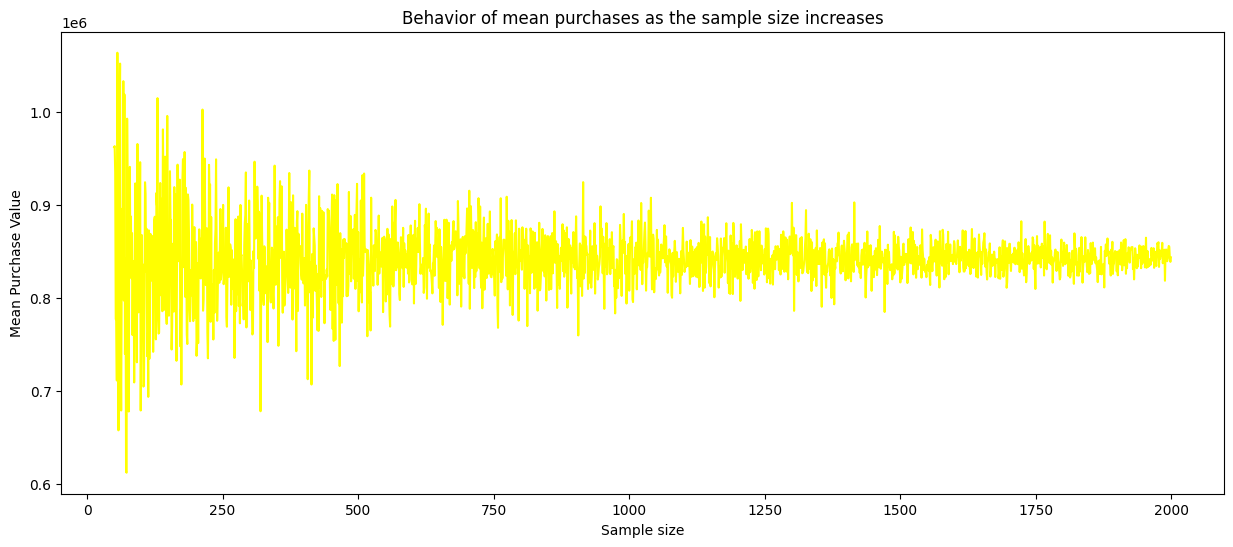

In [111]:
# Creating a plot using matplotlib to visualize the trend of the mean purchases 
    # as the sample size increases

plt.figure(figsize = (15, 6))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 2000), mean_purchases,color = 'yellow')
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()
plt.show()

#### Finding the confidence interval of each married's total spending on the Black Friday


In [112]:
married_means = []
size = df_married['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = df_married['Total_Purchase'].sample(size, replace = True).mean()
    married_means.append(sample_mean)

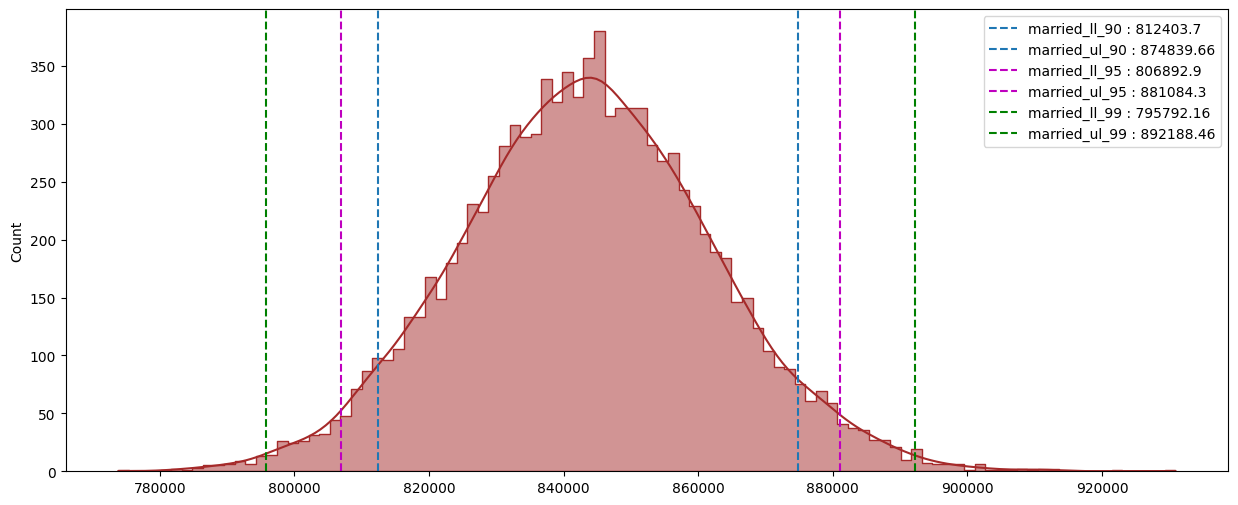

In [113]:
# The below code generates a histogram plot with kernel density estimation and 
    # adds vertical lines to represent confidence intervals at 90%, 95%, and 99% level

plt.figure(figsize = (15, 6))     # setting the figure size of the plot

sns.histplot(married_means, kde = True, bins = 100, fill = True, element = 'step',color = 'brown')

# Above line plots a histogram of the data contained in the `married_means` variable. 
    # The `kde=True` argument adds a kernel density estimation line to the plot. 
    # The `bins=100` argument sets the number of bins for the histogram
    

# Above line calculates the z-score corresponding to the 90% confidence level using the 
    # inverse of the cumulative distribution function (CDF) of a standard normal distribution
    
married_ll_90 = np.percentile(married_means, 5)
    # calculating the lower limit of the 90% confidence interval
married_ul_90 = np.percentile(married_means, 95)
    # calculating the upper limit of the 90% confidence interval
plt.axvline(married_ll_90, label = f'married_ll_90 : {round(married_ll_90, 2)}', linestyle = '--')
    # adding a vertical line at the lower limit of the 90% confidence interval
plt.axvline(married_ul_90, label = f'married_ul_90 : {round(married_ul_90, 2)}', linestyle = '--')
    # adding a vertical line at the upper limit of the 90% confidence interval
    
# Similar steps are repeated for calculating and plotting the 95% and 99% confidence intervals, 
    # with different line colors (`color='m'` for 95% and `color='g'` for 99%)

married_ll_95 = np.percentile(married_means, 2.5)
married_ul_95 = np.percentile(married_means, 97.5)
plt.axvline(married_ll_95, label = f'married_ll_95 : {round(married_ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(married_ul_95, label = f'married_ul_95 : {round(married_ul_95, 2)}', linestyle = '--', color = 'm')
married_ll_99 = np.percentile(married_means, 0.5)
married_ul_99 = np.percentile(married_means, 99.5)
plt.axvline(married_ll_99, label = f'married_ll_99 : {round(married_ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(married_ul_99, label = f'married_ul_99 : {round(married_ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()    
plt.plot()
plt.show()

In [114]:
print(f"The population mean of total spending of each married customer will be approximately = {np.round(np.mean(married_means), 2)} ")


The population mean of total spending of each married customer will be approximately = 843365.3 


#### Inisght - Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each married customer on Black Friday at Walmart, despite having data for only 2474 individuals having married as marital status. This provides us with a reasonable approximation of the range within which the total purchase of each married customer falls, with a certain level of confidence.

### Question - Confidence intervals and distribution of the mean of the expenses by married customers.
### Answer - The population mean of total spending of each married customer is approximately 843518.72 .

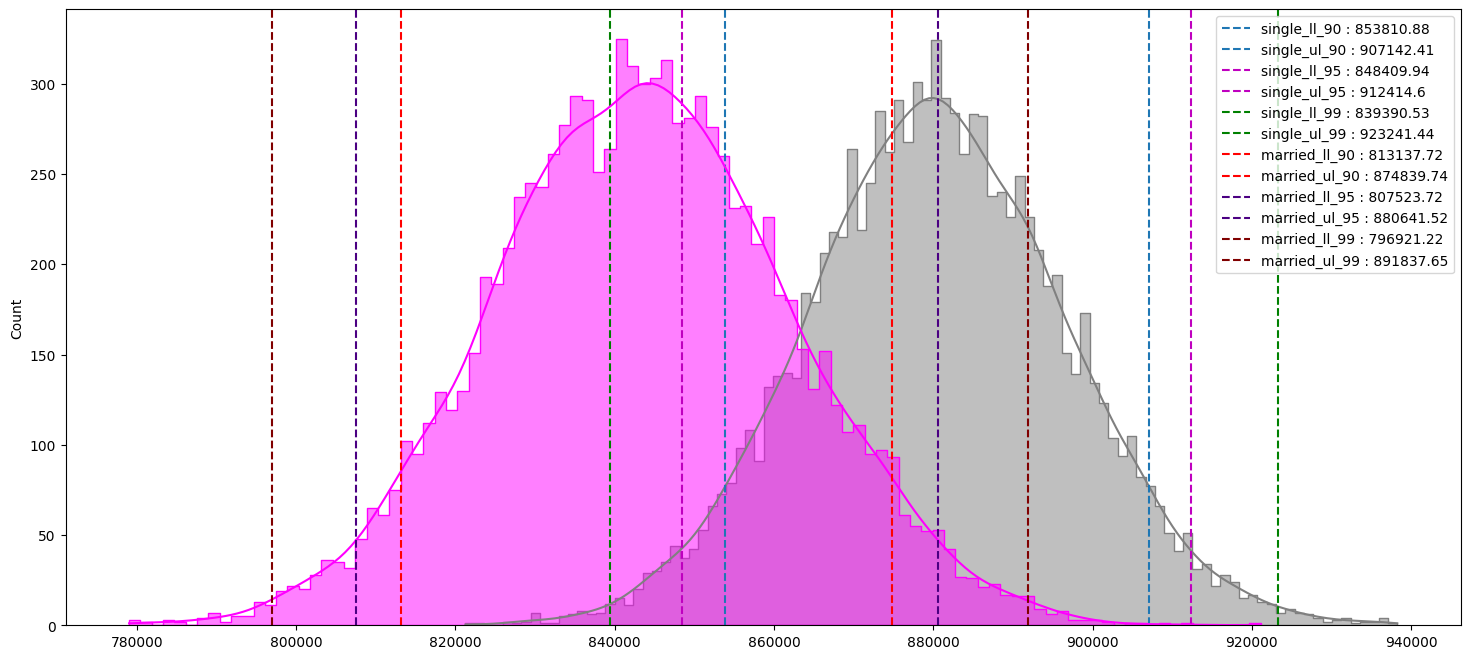

In [103]:
# The code generates a histogram plot to visualize the distributions of single_means and married_means,
    # along with vertical lines indicating confidence interval limits at different confidence levels
    
plt.figure(figsize = (18, 8))

# The first histogram represents the distribution of single_means with gray color having 
    # KDE (Kernel Density Estimation) curves enabled for smooth representation.
sns.histplot(single_means, 
             kde = True, 
             bins = 100, 
             fill = True, 
             element = 'step', 
             color = 'gray',
             legend = True)

# Multiple vertical lines are plotted to represent the lower and upper limits 
    # for confidence intervals at different confidence levels
plt.axvline(single_ll_90, label = f'single_ll_90 : {round(single_ll_90, 2)}', linestyle = '--')
plt.axvline(single_ul_90, label = f'single_ul_90 : {round(single_ul_90, 2)}', linestyle = '--')
plt.axvline(single_ll_95, label = f'single_ll_95 : {round(single_ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(single_ul_95, label = f'single_ul_95 : {round(single_ul_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(single_ll_99, label = f'single_ll_99 : {round(single_ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(single_ul_99, label = f'single_ul_99 : {round(single_ul_99, 2)}', linestyle = '--', color = 'g')
# The second histogram represents the distribution of married_means with magenta color
    # KDE (Kernel Density Estimation) curves enabled for smooth representation.
sns.histplot(married_means, 
             kde = True, 
             bins = 100, 
             fill = True, 
             element = 'step', 
             color = 'magenta',
             legend = True)

# Multiple vertical lines are plotted to represent the lower and upper limits 
    # for confidence intervals at different confidence levels
plt.axvline(married_ll_90, label = f'married_ll_90 : {round(married_ll_90, 2)}', linestyle = '--', color = 'r')
plt.axvline(married_ul_90, label = f'married_ul_90 : {round(married_ul_90, 2)}', linestyle = '--', color = 'r')
plt.axvline(married_ll_95, label = f'married_ll_95 : {round(married_ll_95, 2)}', linestyle = '--', color = 'indigo')
plt.axvline(married_ul_95, label = f'married_ul_95 : {round(married_ul_95, 2)}', linestyle = '--', color = 'indigo')
plt.axvline(married_ll_99, label = f'married_ll_99 : {round(married_ll_99, 2)}', linestyle = '--', color = 'maroon')
plt.axvline(married_ul_99, label = f'married_ul_99 : {round(married_ul_99, 2)}', linestyle = '--', color = 'maroon')

plt.legend()
plt.plot()
plt.show()

#### Insight - It can be inferred from the above chart that the distributions of singles' total spending and married individuals' total spending overlap. It suggests that there is no significant difference in spending habits between these two groups.

### Question - Are married customers spending more money per transaction than unmarried customers? Why or Why not?
### Answer - The population mean of total spending of each married customer is approximately 843518.72 while for each unmarried customer total spending is approximately 880397.15.Therefore we can conclude that unmarried customers spend more money than married ones.

### Question - Are confidence intervals of average married and unmarried customers spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?
### Answer - Yes, the confidence intervals of average married and unmarried customers spending are overlapping.It suggests no significant spending difference. Walmart can leverage this by adopting inclusive marketing, diversifying products, improving overall store experience, and using data analytics for ongoing adjustments, ensuring strategies appeal to a broad customer base.

## FOR AGE 

In [104]:
df['Age'].unique()


['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

In [105]:
df_age_0_to_17 = df.loc[df['Age'] == '0-17']
df_age_18_to_25 = df.loc[df['Age'] == '18-25']
df_age_26_to_35 = df.loc[df['Age'] == '26-35']
df_age_36_to_45 = df.loc[df['Age'] == '36-45']
df_age_46_to_50 = df.loc[df['Age'] == '46-50']
df_age_51_to_55 = df.loc[df['Age'] == '51-55']
df_age_above_55 = df.loc[df['Age'] == '55+']

In [107]:
df_age_0_to_17 = df_age_0_to_17.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_18_to_25 = df_age_18_to_25.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_26_to_35 = df_age_26_to_35.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_36_to_45 = df_age_36_to_45.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_46_to_50 = df_age_46_to_50.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_51_to_55 = df_age_51_to_55.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_age_above_55 = df_age_above_55.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})

#### For Age Group 0 - 17 years

In [108]:
df_age_0_to_17


,User_ID,Total_Purchase
0,1000001,334093
1,1000019,1458069
2,1000051,200772
3,1000075,1035584
4,1000086,294063
...,...,...
213,1005844,476231
214,1005953,629161
215,1005973,270475
216,1005989,466195


##### How the deviations vary for different sample sizes ?


In [109]:
# The code snippet performs a loop to calculate the mean purchase for different 
    # sample sizes of customers with age group 0 - 17 yrs.

mean_purchases = []
for sample_size in range(50, 200):
    sample_mean = df_age_0_to_17['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)
    
# It iterates over a range of sample sizes from 50 to 200, and for each iteration, 
    # it takes a random sample of the specified size from the 'Total_Purchase' column 
    # of the 'df_age_0_to_17' DataFrame and calculates the mean of the sampled values. 
    # The calculated mean values are then stored in the 'mean_purchases' list.

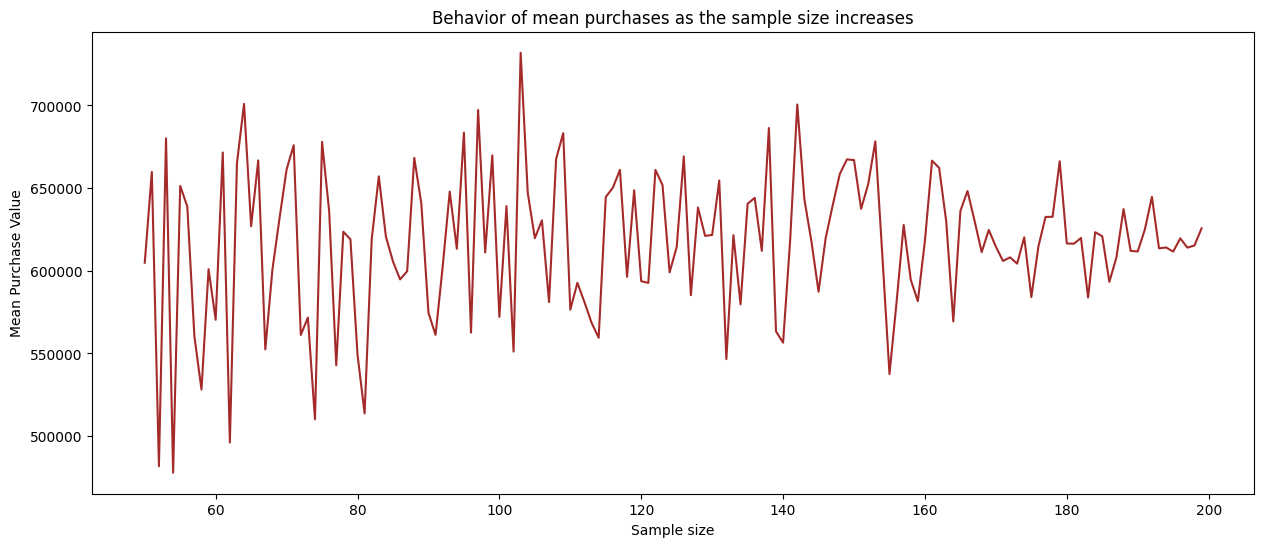

In [110]:
# Creating a plot using matplotlib to visualize the trend of the mean purchases 
    # as the sample size increases

plt.figure(figsize = (15, 6))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 200), mean_purchases,color = 'brown')
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()
plt.show()

##### Finding the confidence interval of total spending for each individual in the age group 0 - 17 on the Black Friday


In [111]:
means = []
size = df_age_0_to_17['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = df_age_0_to_17['Total_Purchase'].sample(size, replace = True).mean()
    means.append(sample_mean)

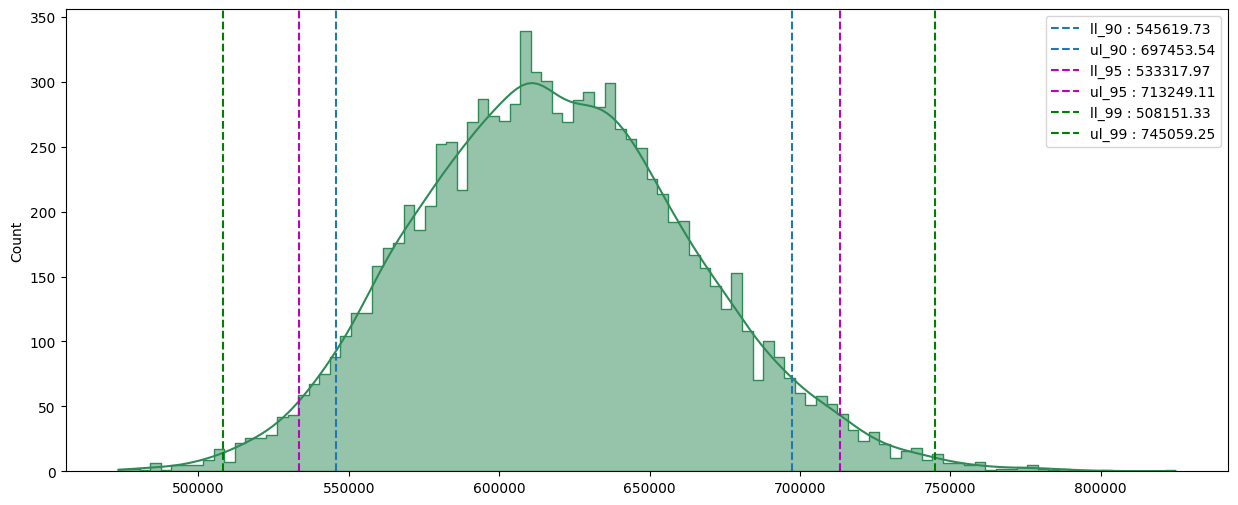

In [112]:
# The below code generates a histogram plot with kernel density estimation and 
    # adds vertical lines to represent confidence intervals at 90%, 95%, and 99% level

plt.figure(figsize = (15, 6))     # setting the figure size of the plot

sns.histplot(means, kde = True, bins = 100, fill = True, element = 'step',color = 'seagreen')

# Above line plots a histogram of the data contained in the `means` variable. 
    # The `kde=True` argument adds a kernel density estimation line to the plot. 
    # The `bins=100` argument sets the number of bins for the histogram
    

# Above line calculates the z-score corresponding to the 90% confidence level using the 
    # inverse of the cumulative distribution function (CDF) of a standard normal distribution
    
ll_90 = np.percentile(means, 5)
    # calculating the lower limit of the 90% confidence interval
ul_90 = np.percentile(means, 95)
    # calculating the upper limit of the 90% confidence interval
plt.axvline(ll_90, label = f'll_90 : {round(ll_90, 2)}', linestyle = '--')
    # adding a vertical line at the lower limit of the 90% confidence interval
plt.axvline(ul_90, label = f'ul_90 : {round(ul_90, 2)}', linestyle = '--')
    # adding a vertical line at the upper limit of the 90% confidence interval
    
# Similar steps are repeated for calculating and plotting the 95% and 99% confidence intervals, 
    # with different line colors (`color='m'` for 95% and `color='g'` for 99%)
ll_95 = np.percentile(means, 2.5)
ul_95 = np.percentile(means, 97.5)
plt.axvline(ll_95, label = f'll_95 : {round(ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(ul_95, label = f'ul_95 : {round(ul_95, 2)}', linestyle = '--', color = 'm')


ll_99 = np.percentile(means, 0.5)
ul_99 = np.percentile(means, 99.5)
plt.axvline(ll_99, label = f'll_99 : {round(ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(ul_99, label = f'ul_99 : {round(ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()     
plt.plot()
plt.show()

#### Insight - Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each individual   in age group 0 - 17 years on Black Friday at Walmart, despite having data for only 218 individuals having age group 0 - 17 years. This provides us with a reasonable approximation of the range within which the total purchase of each individuals having age group 0 - 17 years falls, with a certain level of confidence.

In [113]:
print(f"The population mean of total spending of each customer in age group 0 -17 will be approximately = {np.round(np.mean(means), 2)} ")


The population mean of total spending of each customer in age group 0 -17 will be approximately = 618717.49 


### Question - Confidence intervals and distribution of the mean of the expenses by the age group 0-17.
### Answer - The population mean of total spending of each customer in age group 0-17 is approximately 618717.49 


#### For Age Group 18 - 25 years


In [114]:
df_age_18_to_25


,User_ID,Total_Purchase
0,1000018,1979047
1,1000021,127099
2,1000022,1279914
3,1000025,534706
4,1000034,807983
...,...,...
1064,1005998,702901
1065,1006008,266306
1066,1006027,265201
1067,1006028,362972


##### How the deviations vary for different sample sizes ?


In [115]:
# The code snippet performs a loop to calculate the mean purchase for different 
    # sample sizes of customers with age group 18 - 25 yrs.

mean_purchases = []
for sample_size in range(50, 1000):
    sample_mean = df_age_18_to_25['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)
    
# It iterates over a range of sample sizes from 50 to 1000, and for each iteration, 
    # it takes a random sample of the specified size from the 'Total_Purchase' column 
    # of the 'df_age_18_to_25' DataFrame and calculates the mean of the sampled values. 
    # The calculated mean values are then stored in the 'mean_purchases' list.

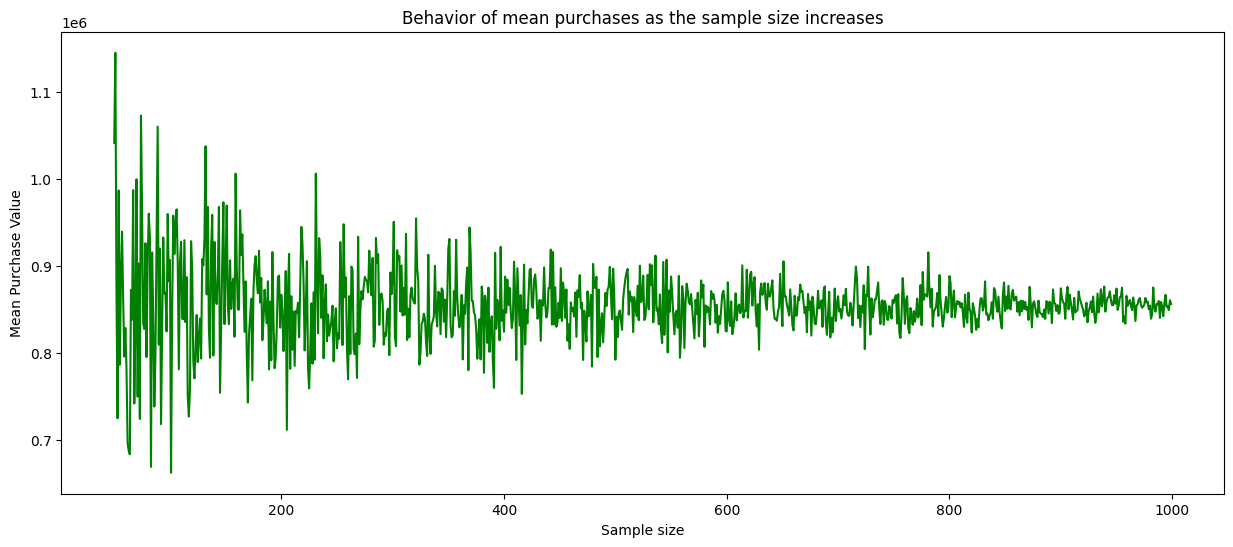

In [118]:
# Creating a plot using matplotlib to visualize the trend of the mean purchases 
    # as the sample size increases

plt.figure(figsize = (15, 6))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 1000), mean_purchases, color = 'green')
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()
plt.show()

##### Finding the confidence interval of total spending for each individual in the age group 18 - 25 on the Black Friday


In [119]:
means = []
size = df_age_18_to_25['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = df_age_18_to_25['Total_Purchase'].sample(size, replace = True).mean()
    means.append(sample_mean)

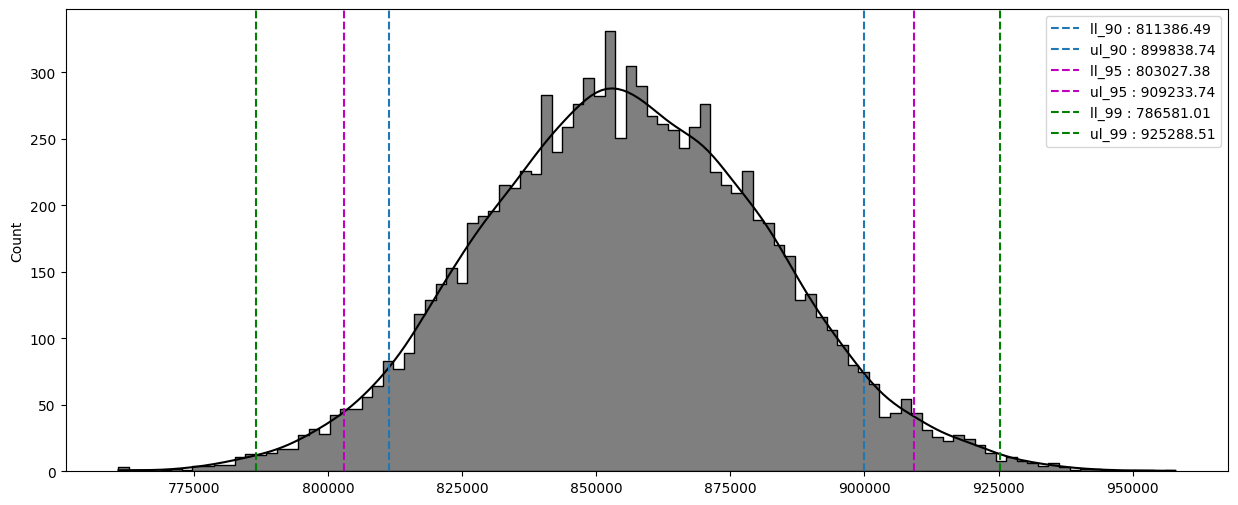

In [122]:
# The below code generates a histogram plot with kernel density estimation and 
    # adds vertical lines to represent confidence intervals at 90%, 95%, and 99% level

plt.figure(figsize = (15, 6))     # setting the figure size of the plot

sns.histplot(means, kde = True, bins = 100, fill = True, element = 'step',color = 'black')

# Above line plots a histogram of the data contained in the `means` variable. 
    # The `kde=True` argument adds a kernel density estimation line to the plot. 
    # The `bins=100` argument sets the number of bins for the histogram
    

# Above line calculates the z-score corresponding to the 90% confidence level using the 
    # inverse of the cumulative distribution function (CDF) of a standard normal distribution
    
ll_90 = np.percentile(means, 5)
    # calculating the lower limit of the 90% confidence interval
ul_90 = np.percentile(means, 95)
    # calculating the upper limit of the 90% confidence interval
plt.axvline(ll_90, label = f'll_90 : {round(ll_90, 2)}', linestyle = '--')
    # adding a vertical line at the lower limit of the 90% confidence interval
plt.axvline(ul_90, label = f'ul_90 : {round(ul_90, 2)}', linestyle = '--')
    # adding a vertical line at the upper limit of the 90% confidence interval
    
# Similar steps are repeated for calculating and plotting the 95% and 99% confidence intervals, 
    # with different line colors (`color='m'` for 95% and `color='g'` for 99%)
ll_95 = np.percentile(means, 2.5)
ul_95 = np.percentile(means, 97.5)
plt.axvline(ll_95, label = f'll_95 : {round(ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(ul_95, label = f'ul_95 : {round(ul_95, 2)}', linestyle = '--', color = 'm')


ll_99 = np.percentile(means, 0.5)
ul_99 = np.percentile(means, 99.5)
plt.axvline(ll_99, label = f'll_99 : {round(ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(ul_99, label = f'ul_99 : {round(ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()     
plt.plot() 
plt.show()

#### Insight - Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each individual in age group 18 - 25 years on Black Friday at Walmart, despite having data for only 1069 individuals having age group 18 - 25 years. This provides us with a reasonable approximation of the range within which the total purchase of each individuals having age group 18 - 25 years falls, with a certain level of confidence.

In [123]:
print(f"The population mean of total spending of each customer in age group 18 - 25 will be approximately = {np.round(np.mean(means), 2)} ")


The population mean of total spending of each customer in age group 18 - 25 will be approximately = 855343.39 


### Question - Confidence intervals and distribution of the mean of the expenses by the age group 18-25.
### Answer - The population mean of total spending of each customer in age group 18-25 is approximately 855343.39.

#### For Age Group 26 - 35 years


In [124]:
df_age_26_to_35


,User_ID,Total_Purchase
0,1000003,341635
1,1000005,821001
2,1000008,796593
3,1000009,594099
4,1000011,557023
...,...,...
2048,1006030,737361
2049,1006034,197086
2050,1006035,956645
2051,1006036,4116058


##### How the deviations vary for different sample sizes ?


In [126]:
# The code snippet performs a loop to calculate the mean purchase for different 
    # sample sizes of customers with age group 26 - 35 yrs.

mean_purchases = []
for sample_size in range(50, 2000):
    sample_mean = df_age_26_to_35['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)
    
# It iterates over a range of sample sizes from 50 to 2000, and for each iteration, 
    # it takes a random sample of the specified size from the 'Total_Purchase' column 
    # of the 'df_age_26_to_35' DataFrame and calculates the mean of the sampled values. 
    # The calculated mean values are then stored in the 'mean_purchases' list.

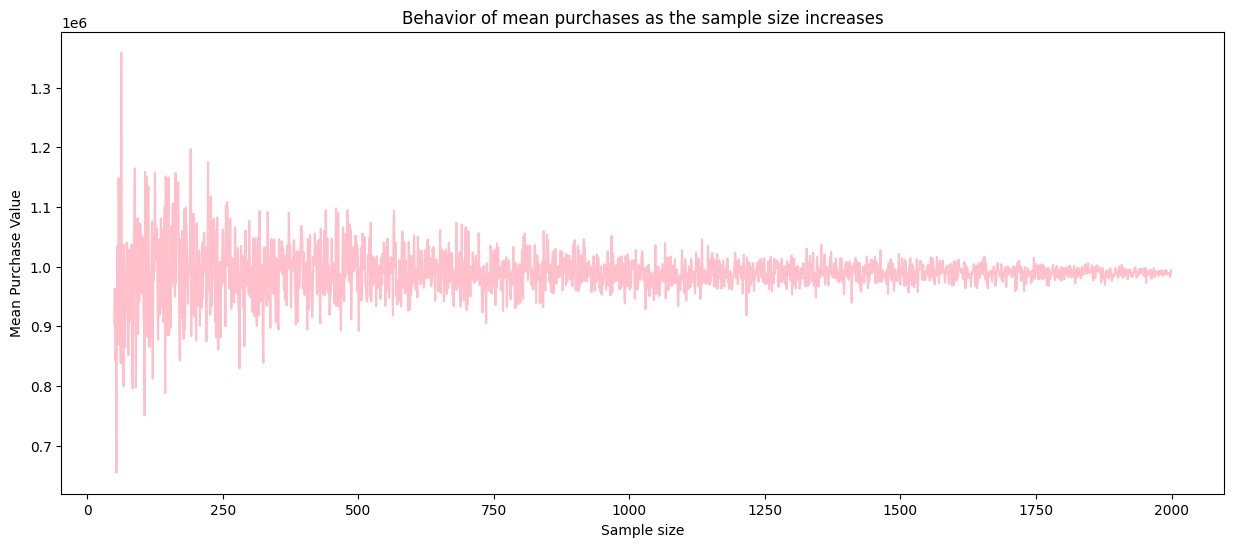

In [127]:
# Creating a plot using matplotlib to visualize the trend of the mean purchases 
    # as the sample size increases

plt.figure(figsize = (15, 6))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 2000), mean_purchases,color = 'pink')
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()
plt.show()

##### Finding the confidence interval of total spending for each individual in the age group 26 - 35 on the Black Friday


In [128]:
means = []
size = df_age_26_to_35['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = df_age_26_to_35['Total_Purchase'].sample(size, replace = True).mean()
    means.append(sample_mean)

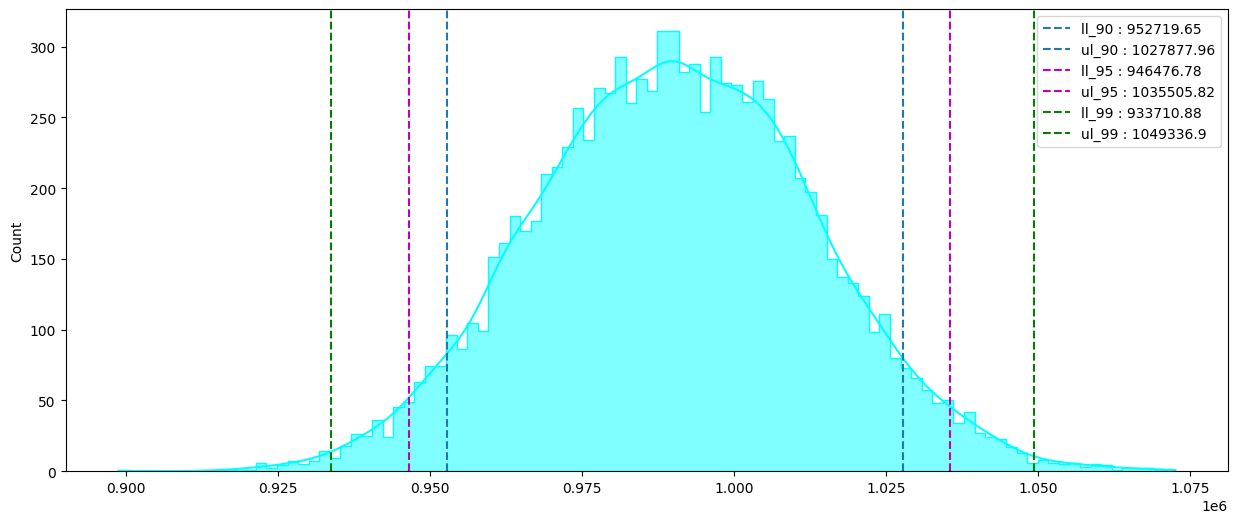

In [129]:
# The below code generates a histogram plot with kernel density estimation and 
    # adds vertical lines to represent confidence intervals at 90%, 95%, and 99% level

plt.figure(figsize = (15, 6))     # setting the figure size of the plot

sns.histplot(means, kde = True, bins = 100, fill = True, element = 'step',color = 'cyan')

# Above line plots a histogram of the data contained in the `means` variable. 
    # The `kde=True` argument adds a kernel density estimation line to the plot. 
    # The `bins=100` argument sets the number of bins for the histogram
    

# Above line calculates the z-score corresponding to the 90% confidence level using the 
    # inverse of the cumulative distribution function (CDF) of a standard normal distribution
    
ll_90 = np.percentile(means, 5)
    # calculating the lower limit of the 90% confidence interval
ul_90 = np.percentile(means, 95)
    # calculating the upper limit of the 90% confidence interval
plt.axvline(ll_90, label = f'll_90 : {round(ll_90, 2)}', linestyle = '--')
    # adding a vertical line at the lower limit of the 90% confidence interval
plt.axvline(ul_90, label = f'ul_90 : {round(ul_90, 2)}', linestyle = '--')
    # adding a vertical line at the upper limit of the 90% confidence interval
    
# Similar steps are repeated for calculating and plotting the 95% and 99% confidence intervals, 
    # with different line colors (`color='m'` for 95% and `color='g'` for 99%)
ll_95 = np.percentile(means, 2.5)
ul_95 = np.percentile(means, 97.5)
plt.axvline(ll_95, label = f'll_95 : {round(ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(ul_95, label = f'ul_95 : {round(ul_95, 2)}', linestyle = '--', color = 'm')


ll_99 = np.percentile(means, 0.5)
ul_99 = np.percentile(means, 99.5)
plt.axvline(ll_99, label = f'll_99 : {round(ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(ul_99, label = f'ul_99 : {round(ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()   
plt.plot()  
plt.show()

#### Insight - Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each individual in age group 26 - 35 years on Black Friday at Walmart, despite having data for only 2053 individuals having age group 26 - 35 years. This provides us with a reasonable approximation of the range within which the total purchase of each individuals having age group 26 - 35 years falls, with a certain level of confidence.

In [130]:
print(f"The population mean of total spending of each customer in age group 26 - 35 will be approximately = {np.round(np.mean(means), 2)} ")


The population mean of total spending of each customer in age group 26 - 35 will be approximately = 990305.65 


### Question - Confidence intervals and distribution of the mean of the expenses by the age group 26-35.
### Answer - The population mean of total spending of each customer in age group 26-35 is approximately 990305.65.

#### For Age Group 36 - 45 years


In [131]:
df_age_36_to_45


,User_ID,Total_Purchase
0,1000007,234668
1,1000010,2169510
2,1000014,127629
3,1000016,150490
4,1000023,1670998
...,...,...
1162,1006011,1198714
1163,1006012,127920
1164,1006017,160230
1165,1006018,975585


##### How the deviations vary for different sample sizes ?


In [132]:
# The code snippet performs a loop to calculate the mean purchase for different 
    # sample sizes of customers with age group 36 - 45 yrs.

mean_purchases = []
for sample_size in range(50, 1000):
    sample_mean = df_age_36_to_45['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)
    
# It iterates over a range of sample sizes from 50 to 1000, and for each iteration, 
    # it takes a random sample of the specified size from the 'Total_Purchase' column 
    # of the 'df_age_36_to_45' DataFrame and calculates the mean of the sampled values. 
    # The calculated mean values are then stored in the 'mean_purchases' list.

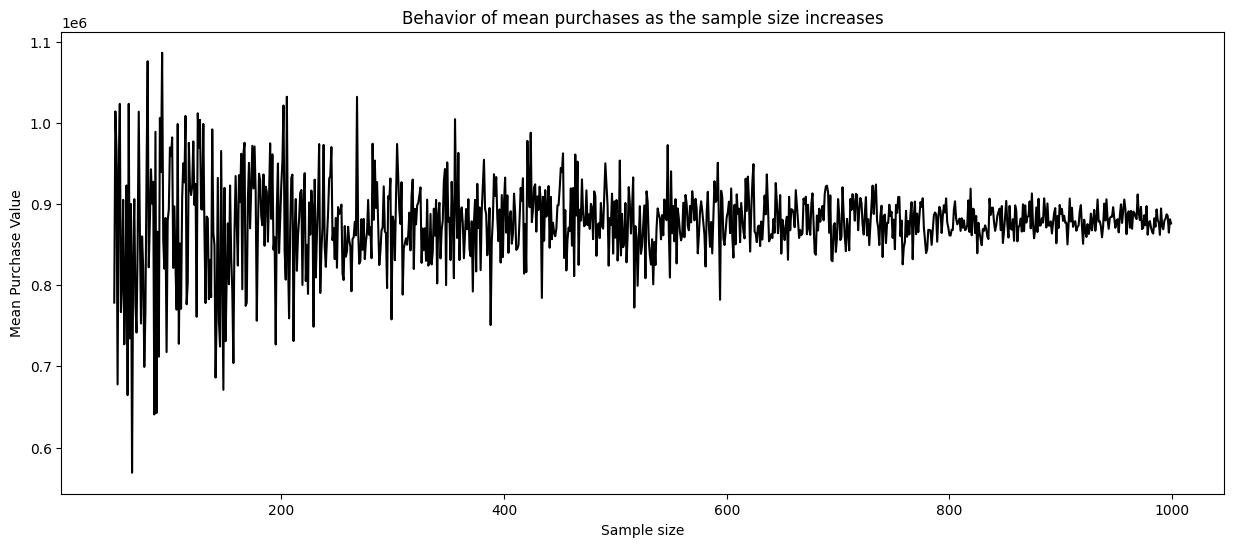

In [133]:
# Creating a plot using matplotlib to visualize the trend of the mean purchases 
    # as the sample size increases

plt.figure(figsize = (15, 6))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 1000), mean_purchases,color = 'black')
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()
plt.show()

##### Finding the confidence interval of total spending for each individual in the age group 36 - 45 on the Black Friday


In [134]:
means = []
size = df_age_36_to_45['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = df_age_36_to_45['Total_Purchase'].sample(size, replace = True).mean()
    means.append(sample_mean)

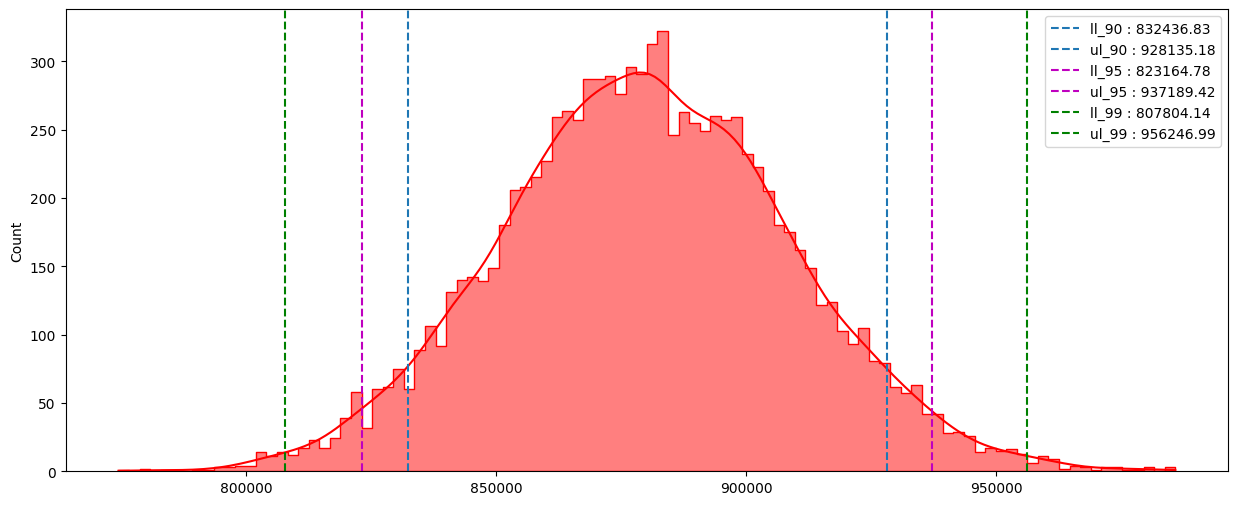

In [136]:
# The below code generates a histogram plot with kernel density estimation and 
    # adds vertical lines to represent confidence intervals at 90%, 95%, and 99% level

plt.figure(figsize = (15, 6))     # setting the figure size of the plot

sns.histplot(means, kde = True, bins = 100, fill = True, element = 'step',color = 'red')

# Above line plots a histogram of the data contained in the `means` variable. 
    # The `kde=True` argument adds a kernel density estimation line to the plot. 
    # The `bins=100` argument sets the number of bins for the histogram
    

# Above line calculates the z-score corresponding to the 90% confidence level using the 
    # inverse of the cumulative distribution function (CDF) of a standard normal distribution
    
ll_90 = np.percentile(means, 5)
    # calculating the lower limit of the 90% confidence interval
ul_90 = np.percentile(means, 95)
    # calculating the upper limit of the 90% confidence interval
plt.axvline(ll_90, label = f'll_90 : {round(ll_90, 2)}', linestyle = '--')
    # adding a vertical line at the lower limit of the 90% confidence interval
plt.axvline(ul_90, label = f'ul_90 : {round(ul_90, 2)}', linestyle = '--')
    # adding a vertical line at the upper limit of the 90% confidence interval
    
# Similar steps are repeated for calculating and plotting the 95% and 99% confidence intervals, 
    # with different line colors (`color='m'` for 95% and `color='g'` for 99%)
ll_95 = np.percentile(means, 2.5)
ul_95 = np.percentile(means, 97.5)
plt.axvline(ll_95, label = f'll_95 : {round(ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(ul_95, label = f'ul_95 : {round(ul_95, 2)}', linestyle = '--', color = 'm')


ll_99 = np.percentile(means, 0.5)
ul_99 = np.percentile(means, 99.5)
plt.axvline(ll_99, label = f'll_99 : {round(ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(ul_99, label = f'ul_99 : {round(ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()     
plt.plot()  
plt.show()

#### Insight - Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each individual in age group 36 - 45 years on Black Friday at Walmart, despite having data for only 1167 individuals having age group 36 - 45 years. This provides us with a reasonable approximation of the range within which the total purchase of each individuals having age group 36 - 45 years falls, with a certain level of confidence.

In [137]:
print(f"The population mean of total spending of each customer in age group 36 - 45 will be approximately = {np.round(np.mean(means), 2)} ")


The population mean of total spending of each customer in age group 36 - 45 will be approximately = 879955.83 


### Question - Confidence intervals and distribution of the mean of the expenses by the age group 36-45.
### Answer - The population mean of total spending of each customer in age group 36-45 is approximately 879955.83.

#### For Age Group 46 - 50 years


In [138]:
df_age_46_to_50


,User_ID,Total_Purchase
0,1000004,206468
1,1000013,713927
2,1000033,1940418
3,1000035,821303
4,1000044,1180380
...,...,...
526,1006014,528238
527,1006016,3770970
528,1006032,517261
529,1006037,1119538


##### How the deviations vary for different sample sizes ?


In [139]:
# The code snippet performs a loop to calculate the mean purchase for different 
    # sample sizes of customers with age group 46 - 50 yrs.

mean_purchases = []
for sample_size in range(50, 500):
    sample_mean = df_age_46_to_50['Total_Purchase'].sample(sample_size).mean()
    mean_purchases.append(sample_mean)
    
# It iterates over a range of sample sizes from 50 to 500, and for each iteration, 
    # it takes a random sample of the specified size from the 'Total_Purchase' column 
    # of the 'df_age_46_to_50' DataFrame and calculates the mean of the sampled values. 
    # The calculated mean values are then stored in the 'mean_purchases' list

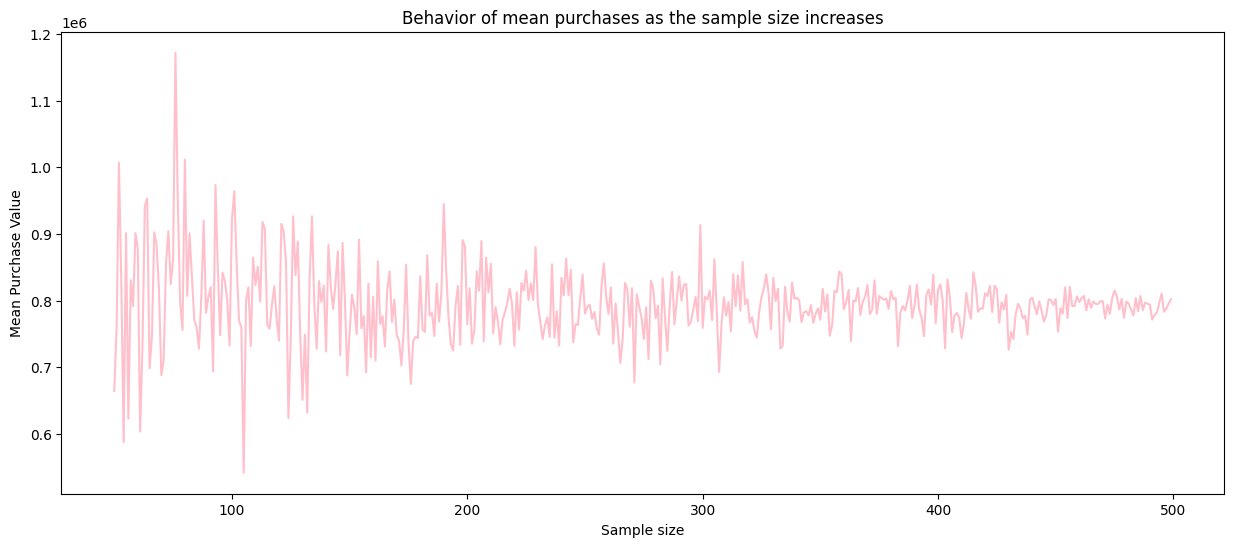

In [140]:
# Creating a plot using matplotlib to visualize the trend of the mean purchases 
    # as the sample size increases

plt.figure(figsize = (15, 6))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 500), mean_purchases,color = 'pink')
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()
plt.show()

##### Finding the confidence interval of total spending for each individual in the age group 46 - 50 on the Black Friday


In [141]:
means = []
size = df_age_46_to_50['Total_Purchase'].shape[0]
for bootstrapped_sample in range(10000):
    sample_mean = df_age_46_to_50['Total_Purchase'].sample(size, replace = True).mean()
    means.append(sample_mean)

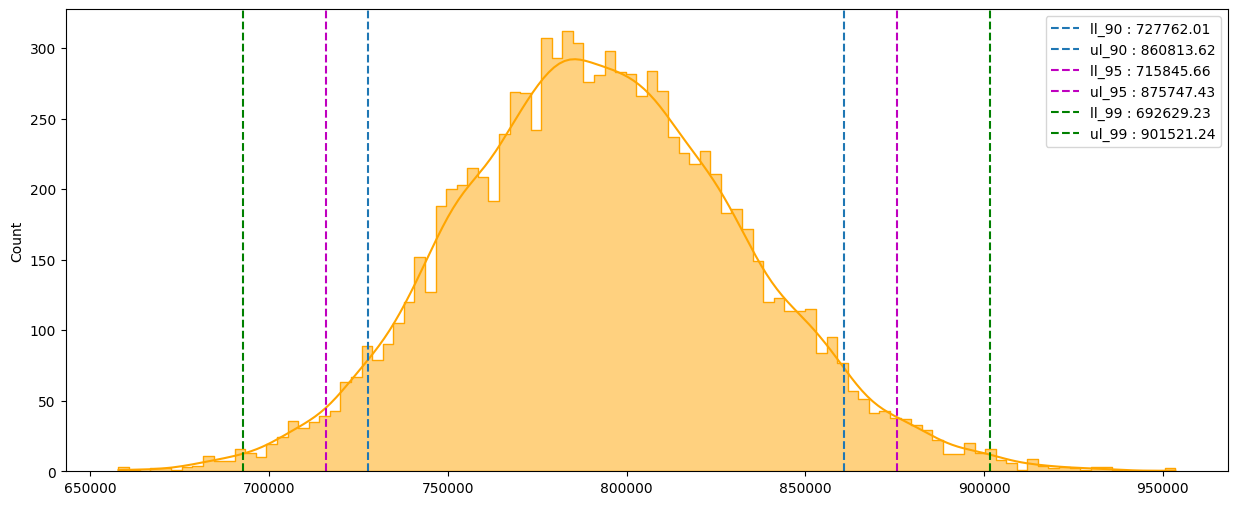

In [142]:
# The below code generates a histogram plot with kernel density estimation and 
    # adds vertical lines to represent confidence intervals at 90%, 95%, and 99% level

plt.figure(figsize = (15, 6))     # setting the figure size of the plot

sns.histplot(means, kde = True, bins = 100, fill = True, element = 'step',color = 'orange')

# Above line plots a histogram of the data contained in the `means` variable. 
    # The `kde=True` argument adds a kernel density estimation line to the plot. 
    # The `bins=100` argument sets the number of bins for the histogram
    

# Above line calculates the z-score corresponding to the 90% confidence level using the 
    # inverse of the cumulative distribution function (CDF) of a standard normal distribution
    
ll_90 = np.percentile(means, 5)
    # calculating the lower limit of the 90% confidence interval
ul_90 = np.percentile(means, 95)
    # calculating the upper limit of the 90% confidence interval
plt.axvline(ll_90, label = f'll_90 : {round(ll_90, 2)}', linestyle = '--')
    # adding a vertical line at the lower limit of the 90% confidence interval
plt.axvline(ul_90, label = f'ul_90 : {round(ul_90, 2)}', linestyle = '--')
    # adding a vertical line at the upper limit of the 90% confidence interval
    
# Similar steps are repeated for calculating and plotting the 95% and 99% confidence intervals, 
    # with different line colors (`color='m'` for 95% and `color='g'` for 99%)
ll_95 = np.percentile(means, 2.5)
ul_95 = np.percentile(means, 97.5)
plt.axvline(ll_95, label = f'll_95 : {round(ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(ul_95, label = f'ul_95 : {round(ul_95, 2)}', linestyle = '--', color = 'm')


ll_99 = np.percentile(means, 0.5)
ul_99 = np.percentile(means, 99.5)
plt.axvline(ll_99, label = f'll_99 : {round(ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(ul_99, label = f'ul_99 : {round(ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()     
plt.plot()  
plt.show()

#### Insight - Through the bootstrapping method, we have been able to estimate the confidence interval for the total purchase made by each individual in age group 46 - 50 years on Black Friday at Walmart, despite having data for only 531 individuals having age group 46 - 50 years. This provides us with a reasonable approximation of the range within which the total purchase of each individuals having age group 46 - 50 years falls, with a certain level of confidence.

In [143]:
print(f"The population mean of total spending of each customer in age group 46 - 50 will be approximately = {np.round(np.mean(means), 2)} ")


The population mean of total spending of each customer in age group 46 - 50 will be approximately = 792890.15 


### Question - Confidence intervals and distribution of the mean of the expenses by the age group 46-50.
### Answer - The population mean of total spending of each customer in age group 46-50 is approximately 792890.15.

### Question - Which age group is spending more money per transaction? Why or Why not?
### Answer - After analysing all the age groups we found that the customers in the age group 26-35 spends the most money because their population mean is 990305.65 which is maximum among all the age groups.

In [154]:
df1 = df[['Occupation','Product_Category','Purchase']]
df1.head()

,Occupation,Product_Category,Purchase
0,10,3,8370
1,10,1,15200
2,10,12,1422
3,10,12,1057
4,16,8,7969


In [155]:
df1.corr()

,Occupation,Product_Category,Purchase
Occupation,1.000000,-0.007618,0.020833
Product_Category,-0.007618,1.000000,-0.343703
Purchase,0.020833,-0.343703,1.000000


## For Correlation

### Heatmap

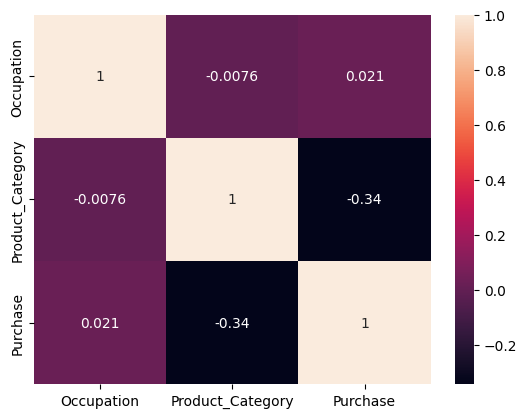

In [156]:
sns.heatmap(df1.corr(), annot = True)
plt.show()

### Pairplots

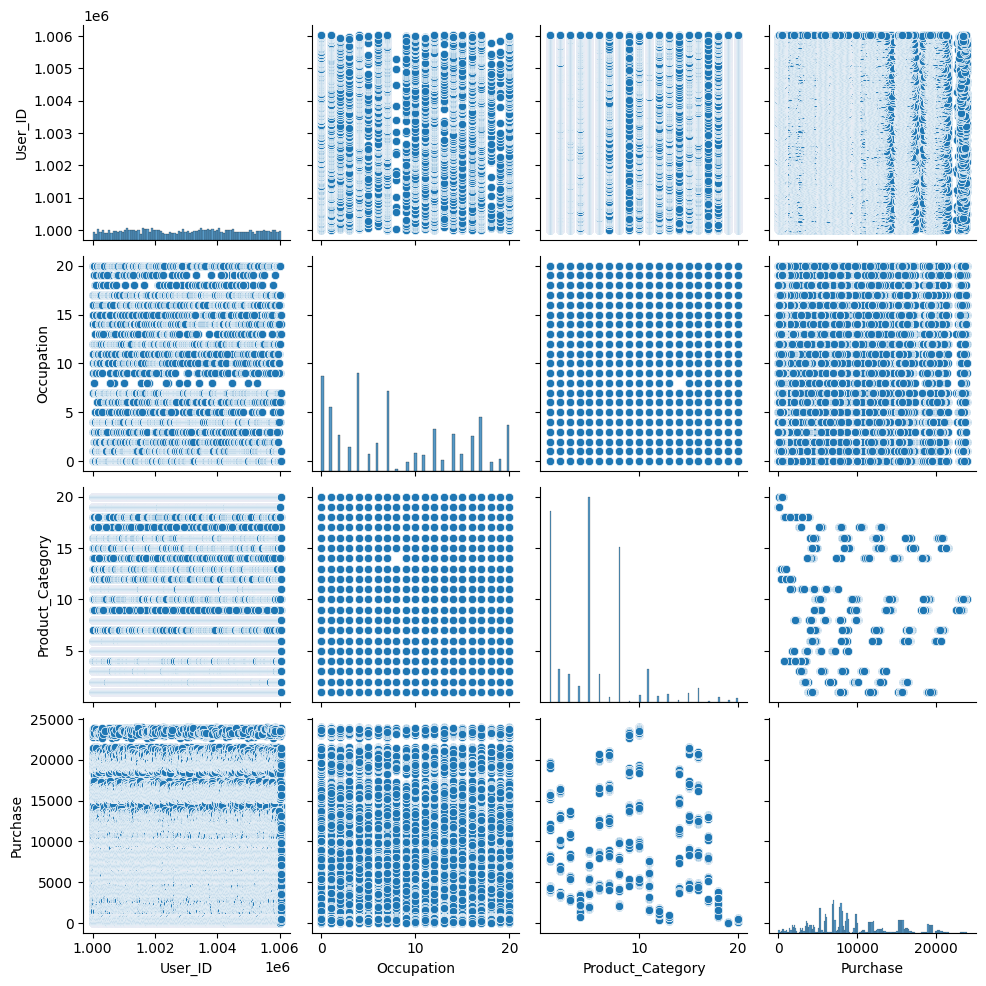

In [145]:
sns.pairplot(df)
plt.show()

# Insights 


1. Among every four transactions conducted at Walmart stores on Black Friday, three are completed by males, and one is carried out by females.

2. Occupations numbered 4, 0, 7, 1, 17, 20, 12, 14, 2, 16, and 6 collectively account for 82.33% of all transactions, listed in descending order of     their contribution.

3. The majority of transactions (53.75% of the total) are initiated by customers who have resided in the current city for either 1 or 2 years.

4. Specifically, 82.43% of all transactions are focused on five product categories: 5, 1, 8, 11, and 2.

5. The customer base comprises 1666 unique females and 4225 unique males. On Black Friday, the average number of transactions per male is 98, while     for females, it is 82.

6. On average, each male spends $925,438.92, whereas each female spends $712,269.56 on Black Friday.

7. Males contribute to 76.72% of the total revenue generated.

8. Out of 5891 unique customers, 42% are married, and 58% are single.

9. On average, married customers make 91 transactions, while single customers make 95 transactions.

10. The average Black Friday purchase for married customers is $843,469.79, and for single customers, it is $880,526.31.

11. Customers who are single generate 59.05% of the total revenue.

12. The majority of transactions occur among customers aged between 26 and 45 years.

13. Approximately 81.82% of all transactions are conducted by customers aged between 18 and 50 years.

14. In total, 81.82% of unique customers fall within the age range of 18 to 50 years.

15. Among all unique customers, 35.85% are in the 26-35 age group, 19.81% are in the 36-45 age group, 18.15% are in the 18-25 age group, and 9.01%      are in the 46-50 age group.

16. Walmart derived 86.21% of its total revenue from customers aged 18 to 50 on Black Friday.

17. Distribution of revenue by age group: 39.87% from the 26-35 age group, 20.15% from the 36-45 age group, 17.93% from the 18-25 age group, and        8.26% from the 46-50 age group.

18. The majority of unique customers are from city C, constituting 82.26% of the total unique customers in cities C and B combined.

19. Walmart generated 41.52% of its total revenue from customers in city B, 32.65% from city C, and 25.83% from city A on Black Friday.

20. The top 5 product categories (1, 5, 8, 6, and 2) contributed to 84.36% of Walmart's total revenue on Black Friday.

21. The population mean of total spending for each male is approximately $925,156.36.

22. The population mean of total spending for each female is approximately $711,789.37.

23. The population mean of total spending for each single individual is approximately $880,356.19.

24. The population mean of total spending for each married male is approximately $843,632.08.

25. The population mean of total spending for each customer in the 0-17 age group is approximately $617,797.25.

26. The population mean of total spending for each customer in the 18-25 age group is approximately $854,676.31.

27. The population mean of total spending for each customer in the 26-35 age group is approximately $989,120.36.

28. The population mean of total spending for each customer in the 36-45 age group is approximately $879,434.88.

30. The population mean of total spending for each customer in the 46-50 age group is approximately $792,671.74.

# Recommendations 


1. **Segmented Marketing Strategies:**
   Implement targeted marketing strategies that cater to the specific preferences and behaviors of male and female customers. This could involve creating gender-specific promotions, advertisements, and product recommendations.

2. **Product Assortment Planning:**
   Tailor the product assortment and inventory based on the identified spending patterns. If there are product categories or items that resonate more with a particular gender, ensure that the stock aligns with customer preferences during the Black Friday sale.

3. **Personalized Promotions:**
   Utilize customer data to create personalized promotions and discounts. Offer incentives that are likely to appeal to the spending habits of both male and female customers, encouraging higher participation in Black Friday sales.

4. **In-Store Experience Enhancement:**
   Enhance the in-store experience during Black Friday to cater to the unique preferences of male and female shoppers. This could include organizing special events, providing personalized shopping assistance, or creating designated areas for popular product categories among each gender.

5. **Data-Driven Decision-Making:**
   Continue to analyze and leverage customer data to refine strategies. Regularly assess the effectiveness of marketing campaigns, promotions, and product placements to make data-driven decisions that align with evolving customer preferences.

6. **Customer Engagement Initiatives:**
   Implement initiatives to engage customers proactively. This could involve loyalty programs, exclusive offers, and early access promotions tailored to both male and female customer segments.

7. **Feedback Mechanisms:**
   Establish feedback mechanisms to directly capture the preferences and feedback of male and female customers. This information can be invaluable for making real-time adjustments and improvements to the Black Friday sales strategy.

8. **Cross-Category Bundles:**
   Explore the possibility of creating cross-category bundles or promotions that cater to the combined preferences of male and female shoppers. This approach can encourage increased spending by offering value in packages that appeal to both segments.

9. **Social Media Engagement:**
   Leverage social media platforms to engage with customers and build anticipation for Black Friday sales. Tailor social media content and campaigns to resonate with the interests and behaviors of both male and female audiences.

10. **Continuous Monitoring and Adaptation:**
    Stay agile and responsive by continuously monitoring customer behavior and market trends. Be prepared to adapt strategies in real-time to capitalize on emerging opportunities and ce overall business performance.